In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Fourier Fun!

# Fourier Transforms 

Fourier transforms are powerful mathematical tools that can be used to determine the frequency content of functions or data. The Fourier tranform and the inverse Fourier transform, respectively, are defined to be:

\begin{equation*}
F(k) = \frac{1}{2\pi} \int^{+\infty}_{-\infty} f(x) e^{-ikx}dx \longleftrightarrow f(x) = \int^{+\infty}_{-\infty} F(k) e^{ikx}dk
\end{equation*}

where $F(k),$ which is a complex function, is the Fourier transform of $f(x)$ and $k$ is the wavenumber. The factor of $1/2\pi$ is a convention along with the sign on the phase. There is no universally accepted convention here, so you will need to look at how the Fourier transforms are defined by different people. The convention shown above is pretty common. As long as the convention is kept consistent throughout the calculation there should be no issues. You should look into the convention that *numpy* and *scipy* use. 

If you are interested in angular frequency ($\omega$) and in terms of frequency ($f$) of a time variable signal $f(t)$, you can rewrite the Fourier transform to be:

\begin{equation*}
X(\omega) = \frac{1}{2\pi} \int^{+\infty}_{-\infty} x(t) e^{-i\omega t}dt \qquad X(f) = \frac{1}{2\pi} \int^{+\infty}_{-\infty} x(t) e^{-i2\pi f t}dt
\end{equation*}

where $\omega = 2\pi f$.

# Important Properties of Fourier Transforms

First, let's denote $\mathfrak{F}$ and $\mathfrak{F}^{-1}$ as the Fourier and inverse Fourier transform operations. For example, $\mathfrak{F}^{-1}(X(f)) = x(t).$ We can write the following properties of Fourier transforms:

**Linearity:**$\qquad \mathfrak{F}(\alpha x(t) + \beta y(t)) = \alpha X(f) + \beta Y(f)$

**Duality:**$\qquad x(t) \longleftrightarrow X(f) \Rightarrow X(t) \longleftrightarrow x(-f)$

**Conjugation:**$\qquad x(t) \longleftrightarrow X(f) \Rightarrow x^*(t) \longleftrightarrow X^*(-f)$

For a real signal $x(t)$, $X(f) = X^*(-f)$, which gives $|X(f)|^2 = X(f)X^*(f) = X^*(-f)X(-f) = |X(-f)|^2$. This means for a real $x(t)$, $|X(f)|$ is symmetric.

**Convolution:**$\qquad \mathfrak{F}(x * y) = X(f)Y(f)$ and also $\mathfrak{F}(xy) = X * Y$

**Differentiation:**$\qquad \mathfrak{F} \left( \frac{d^kx}{dt^k} \right) = (i2\pi f)^k X(f)$

**Scaling and Shifting:**$\qquad x(at + b) \longleftrightarrow \frac{e^{i2\pi f b/a}}{|a|} X \left( \frac{f}{a} \right)$

# Some Examples

Let's define a sinusoidal function and take its Fourier transform:

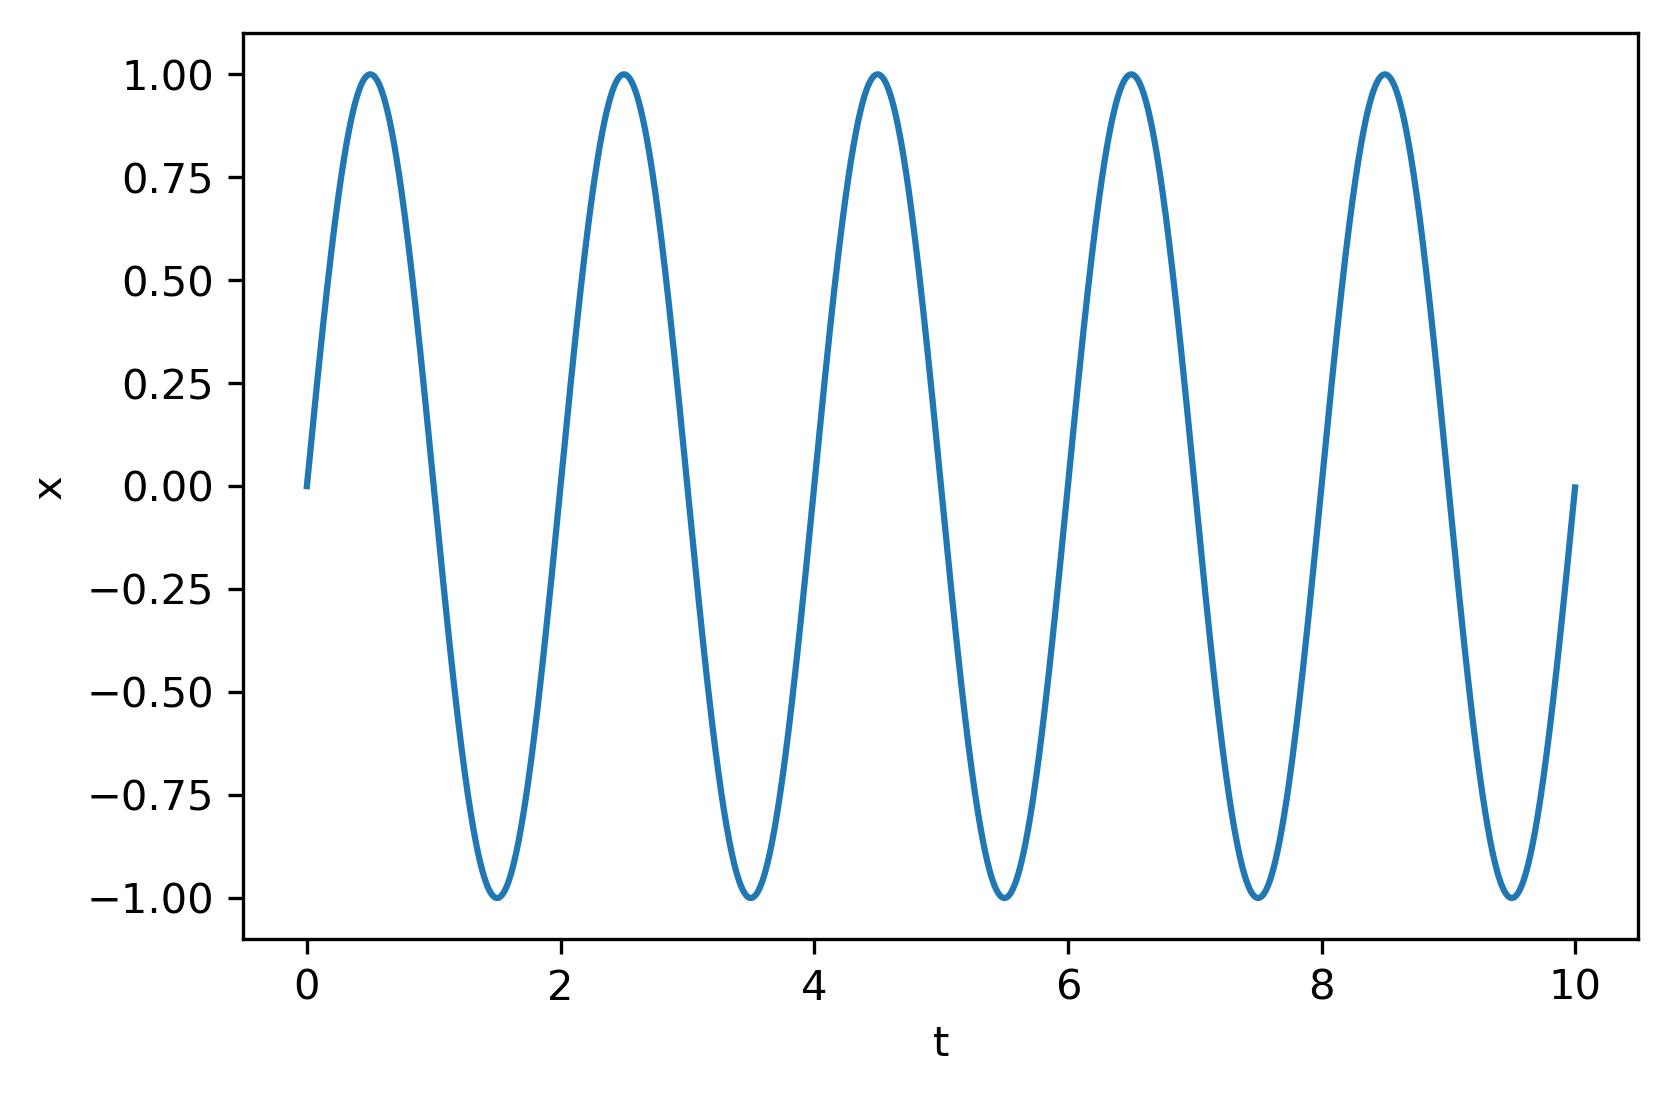

In [5]:
f = 5 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1
x = np.arange(sample)
y = amplitude*np.sin(2 * np.pi * f * x / sample)
plt.plot(x*timestep, y)
plt.xlabel('t')
plt.ylabel('x');

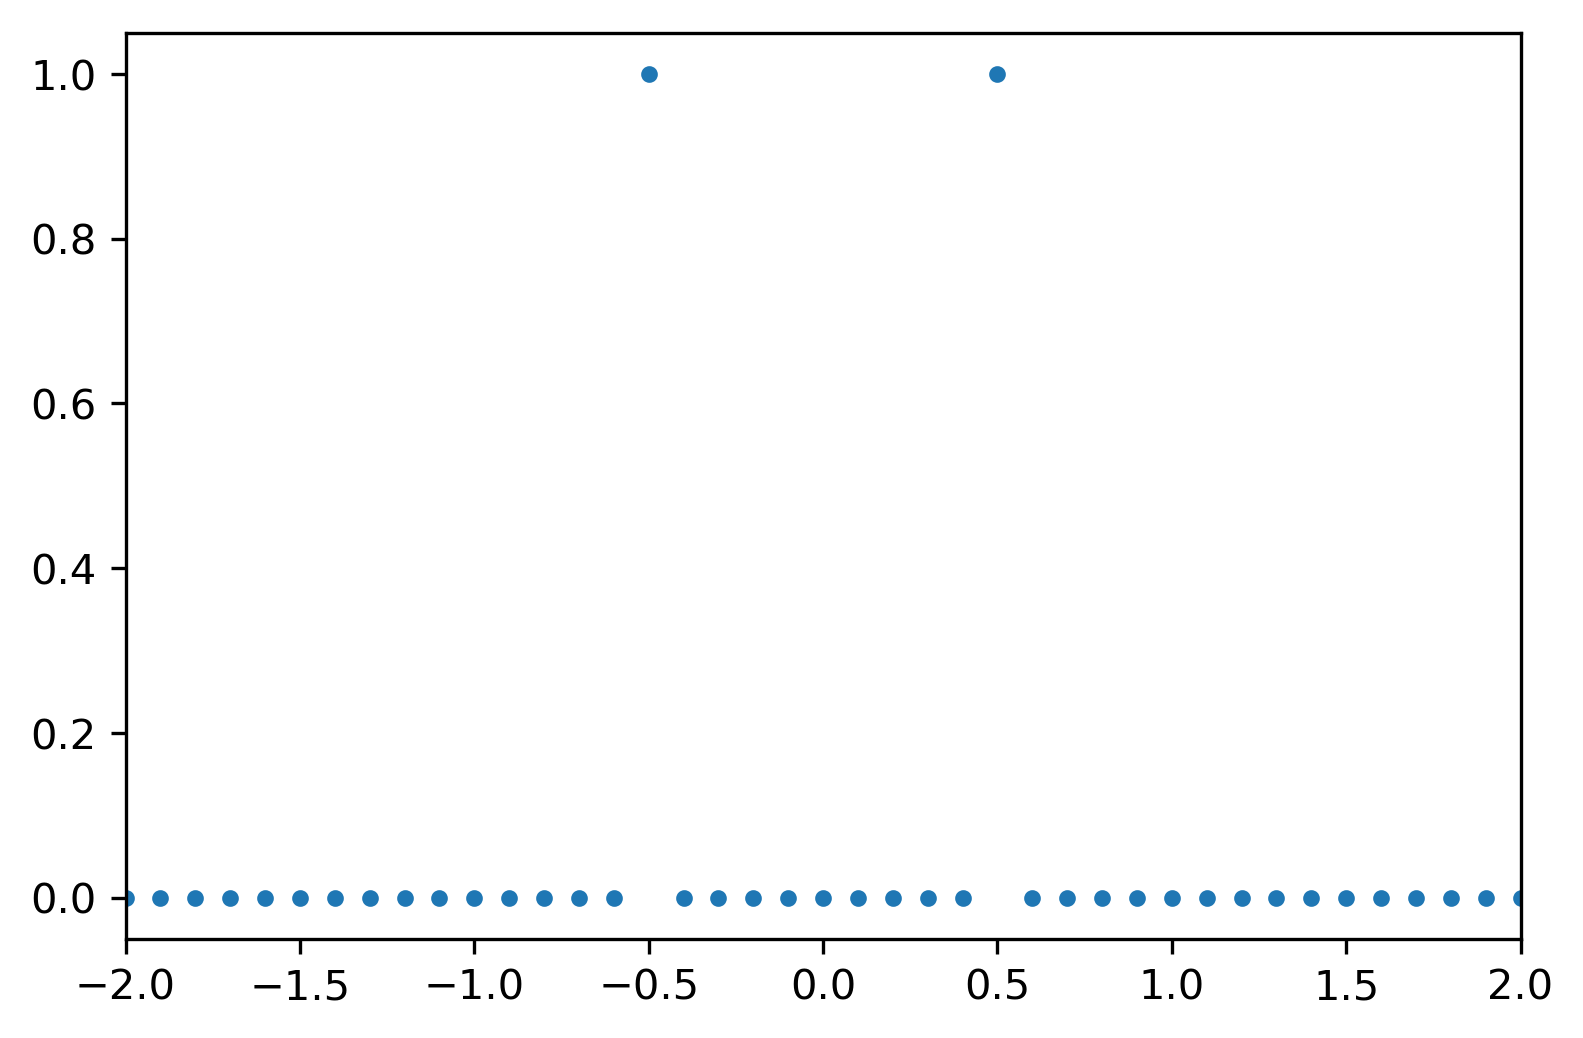

In [6]:
Fy = np.fft.fft(y)/(sample/2)
Fyf = np.fft.fftfreq(sample,d=timestep) #Calculate the frequency steps
plt.plot(Fyf,np.abs(Fy),'.')
plt.xlim([-2,2]);

Now let's add two sine frequency components together:

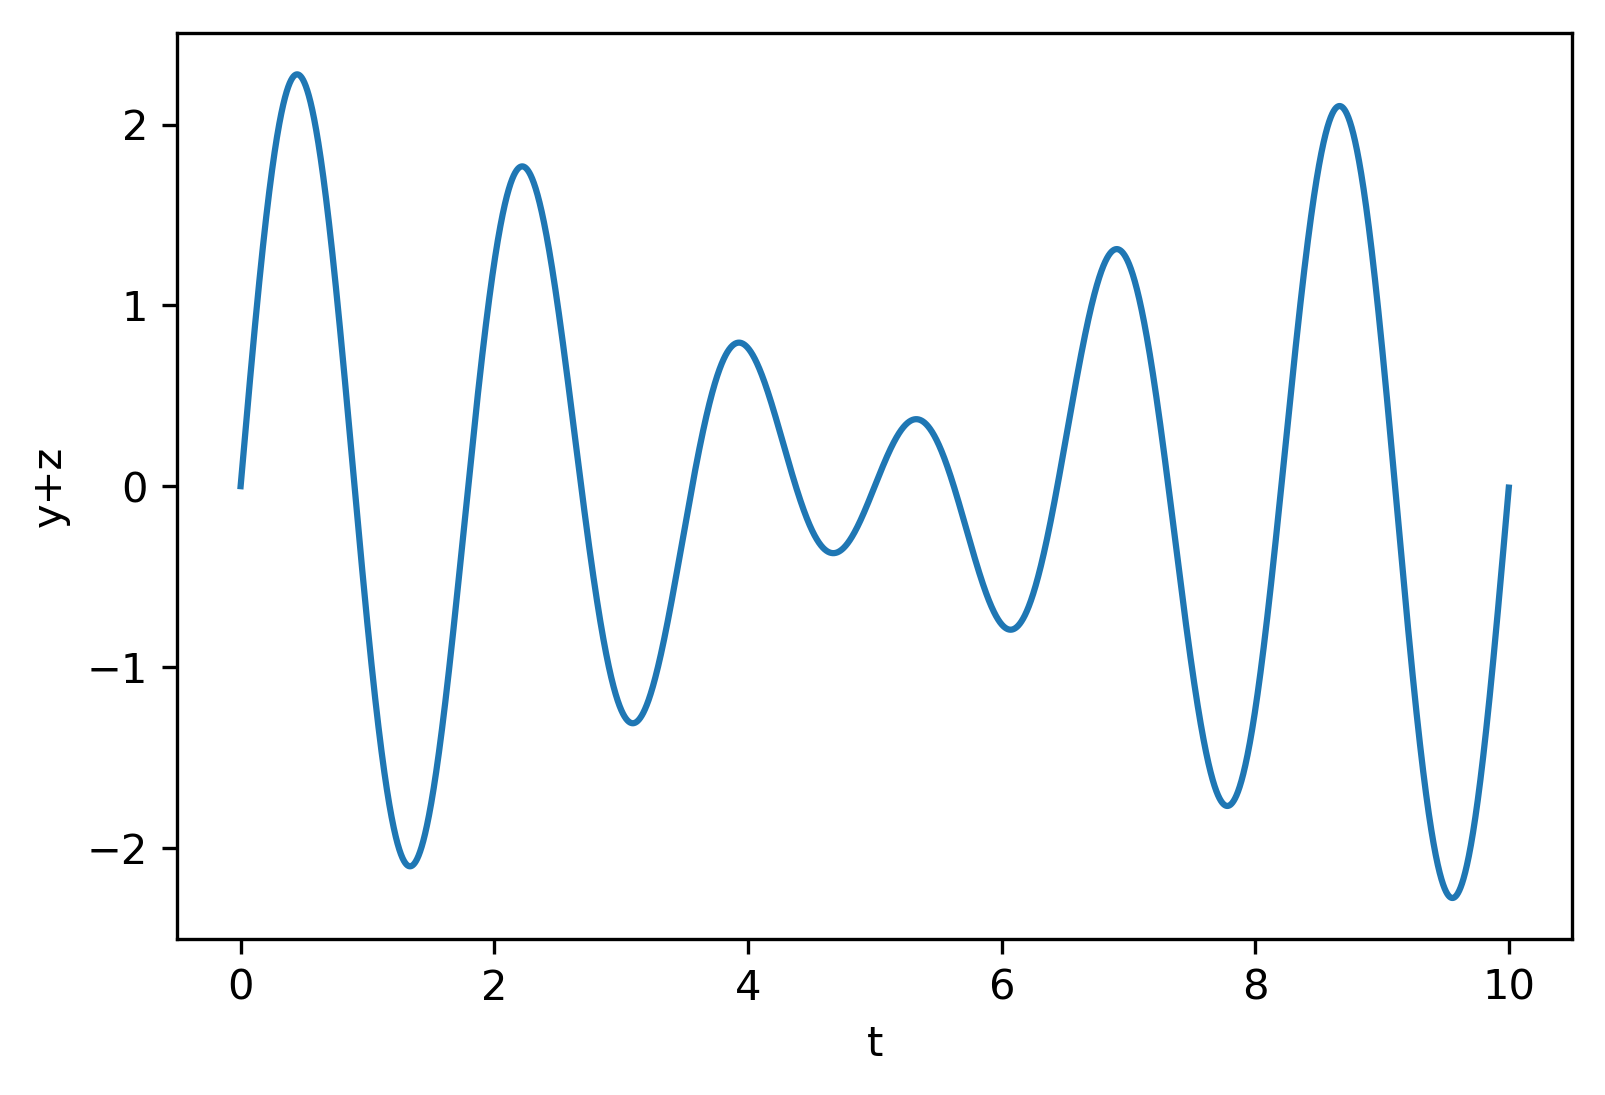

In [7]:
f = 6 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1.3
x = np.arange(sample)
z = amplitude*np.sin(2 * np.pi * f * x / sample)
plt.plot(x*timestep, y+z)
plt.xlabel('t')
plt.ylabel('y+z');

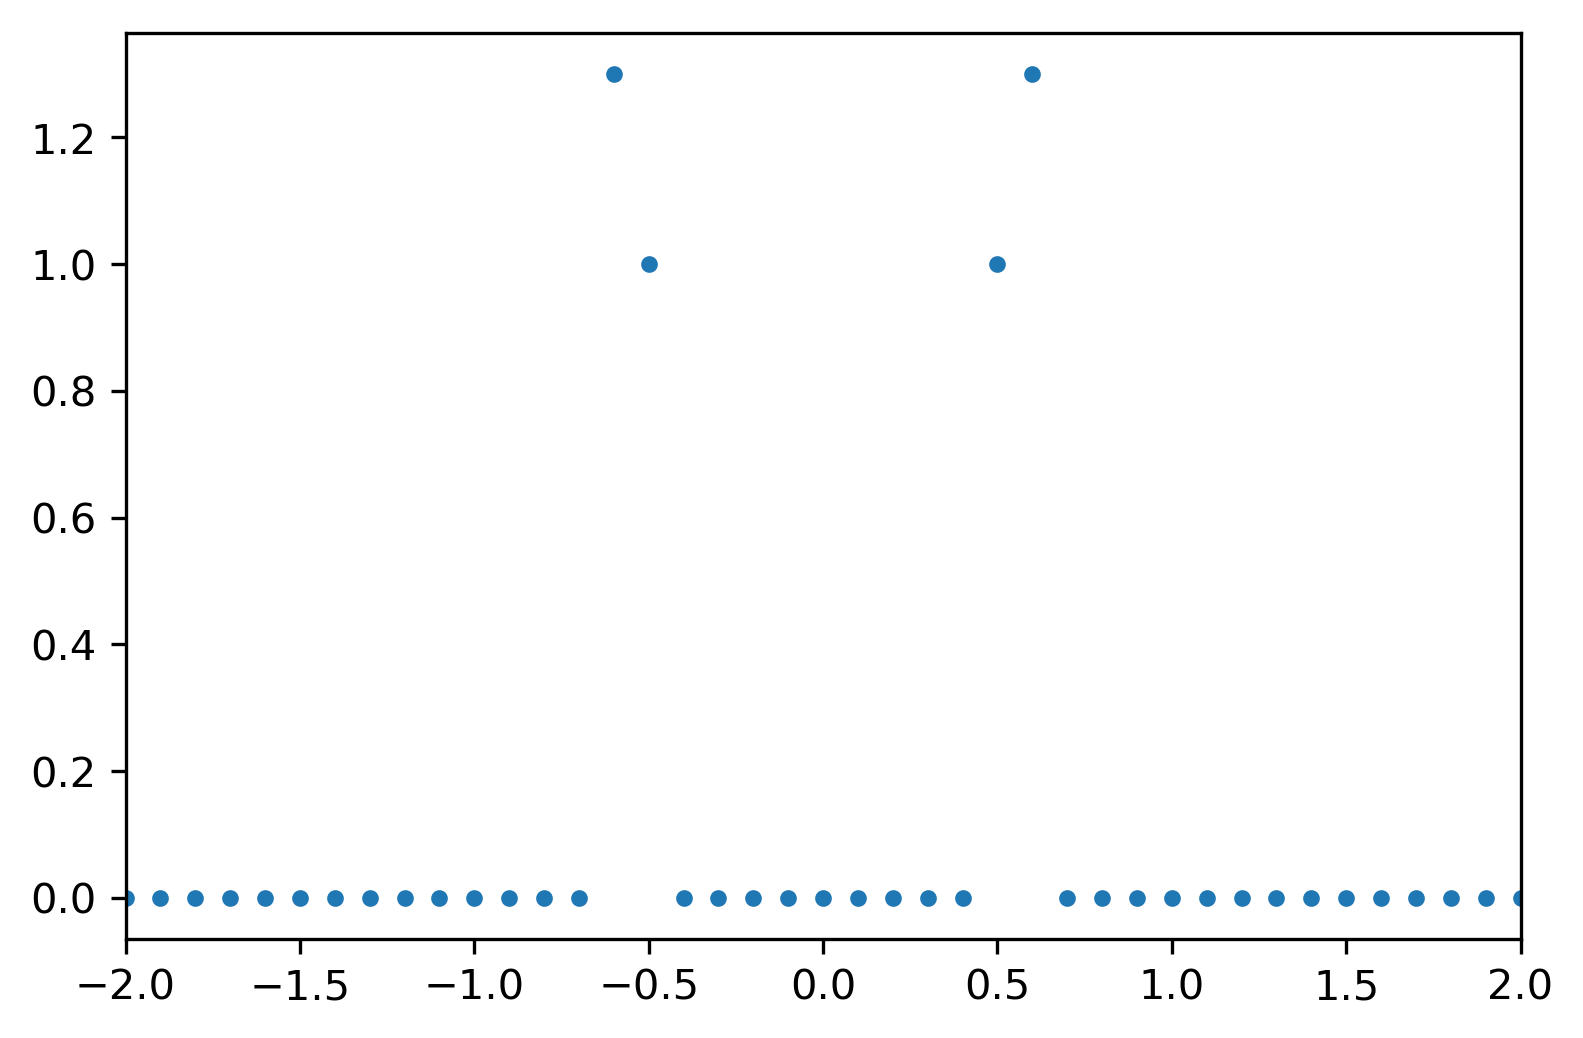

In [8]:
Fyz = np.fft.fft(y+z)/(sample/2)
Fyzf = np.fft.fftfreq(sample,d=timestep) #Calculate the frequency steps of the Fourier transform
plt.plot(Fyzf,np.abs(Fyz),'.')
plt.xlim([-2,2]);

# Discrete Fourier Transforms 

The discrete Fourier transform (DFT) converts a finite sequence of **equally-spaced samples** of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence. An inverse DFT is a Fourier series, using the DTFT samples as coefficients of complex sinusoids at the corresponding DTFT frequencies. It has the same sample-values as the original input sequence. The DFT is therefore said to be a frequency domain representation of the original input sequence. If the original sequence spans all the non-zero values of a function, its DTFT is continuous (and periodic), and the DFT provides discrete samples of one cycle. If the original sequence is one cycle of a periodic function, the DFT provides all the non-zero values of one DTFT cycle. Remember that the DFT assumes periodic boundary conditions. That has some side effects.

There are many ways to define the DFT, varying in the sign of the exponent, normalization, etc. In the *numpy* implementation, the DFT is defined as

\begin{equation*}
A_k = \sum_{m=0}^{n-1} a_m \exp\left\{-2\pi i{mk \over n}\right\} \qquad k = 0,\ldots,n-1.
\end{equation*}

The DFT is in general defined for complex inputs and outputs, and a single-frequency component at linear frequency $f$ is represented by a complex exponential $a_m = \exp\{2\pi i\,f m\Delta t\}$, where $\Delta t$ is the sampling interval.

The inverse DFT is defined as

\begin{equation*}
a_m = \frac{1}{n}\sum_{k=0}^{n-1}A_k\exp\left\{2\pi i{mk\over n}\right\} \qquad m = 0,\ldots,n-1.
\end{equation*}

It differs from the forward transform by the sign of the exponential argument and the default normalization by 1/n.

Fast fourier transforms (FFTs) are frequently used to speed up DFTs. Traditional DFTs have a computation complexity of $O(n^2)$ but FFTs offer $O(nlog(n))$! This is accomplished by a complex computation algorithm, which uses recursion. Optimal speeds for FFTs are obtained when your data set length is a multiple of 2.

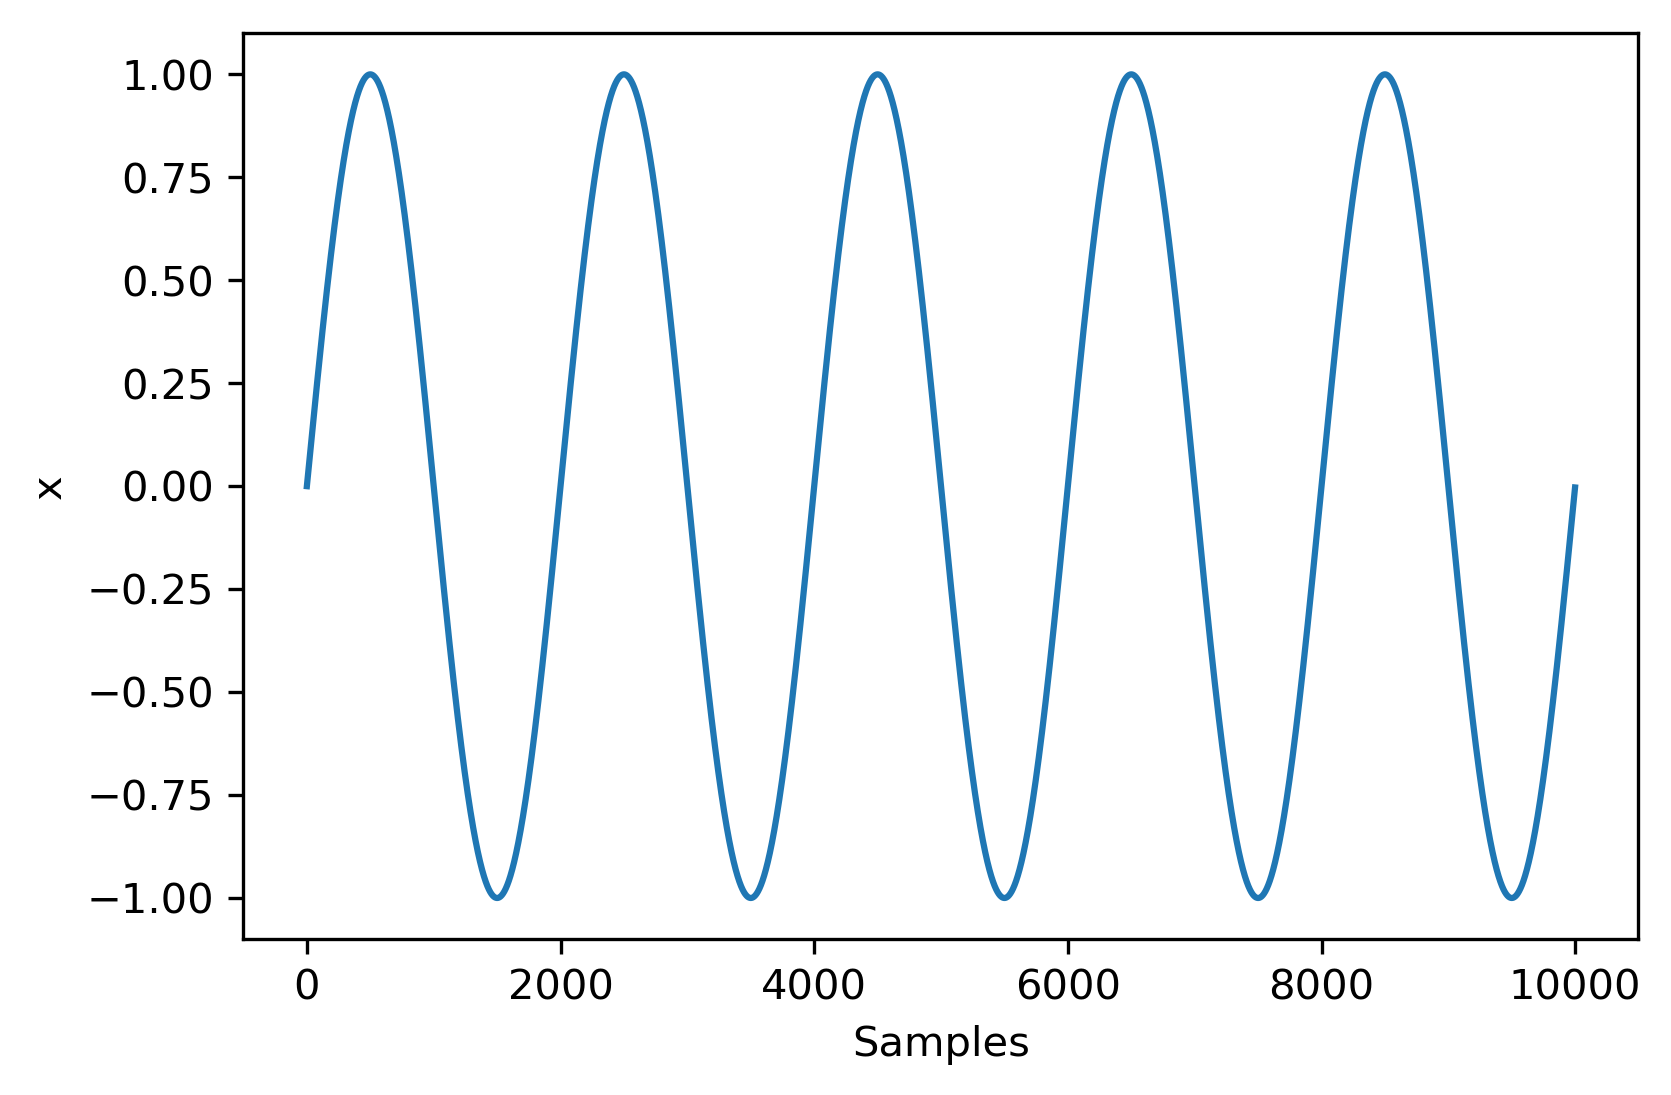

In [9]:
f = 5 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1
x = np.arange(sample)
y = amplitude*np.sin(2 * np.pi * f * x / sample)
plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('x');

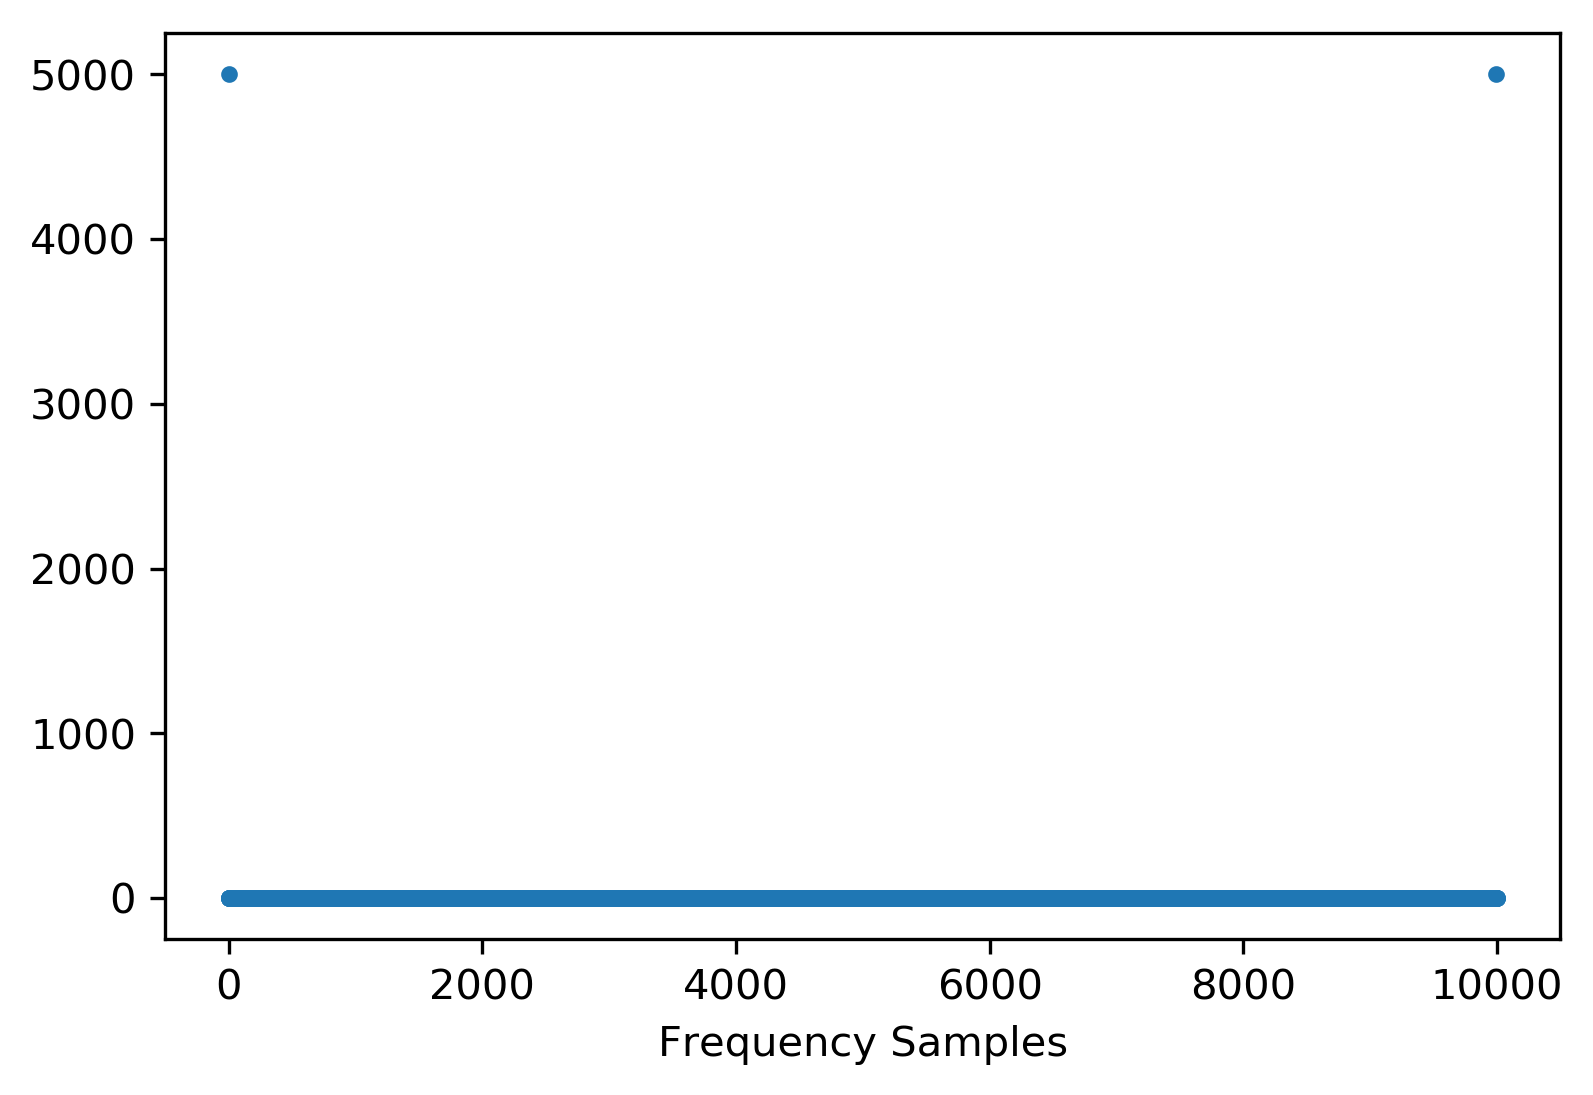

In [10]:
Fyz = np.fft.fft(y)
plt.plot(np.abs(Fyz),'.');
plt.xlabel('Frequency Samples');

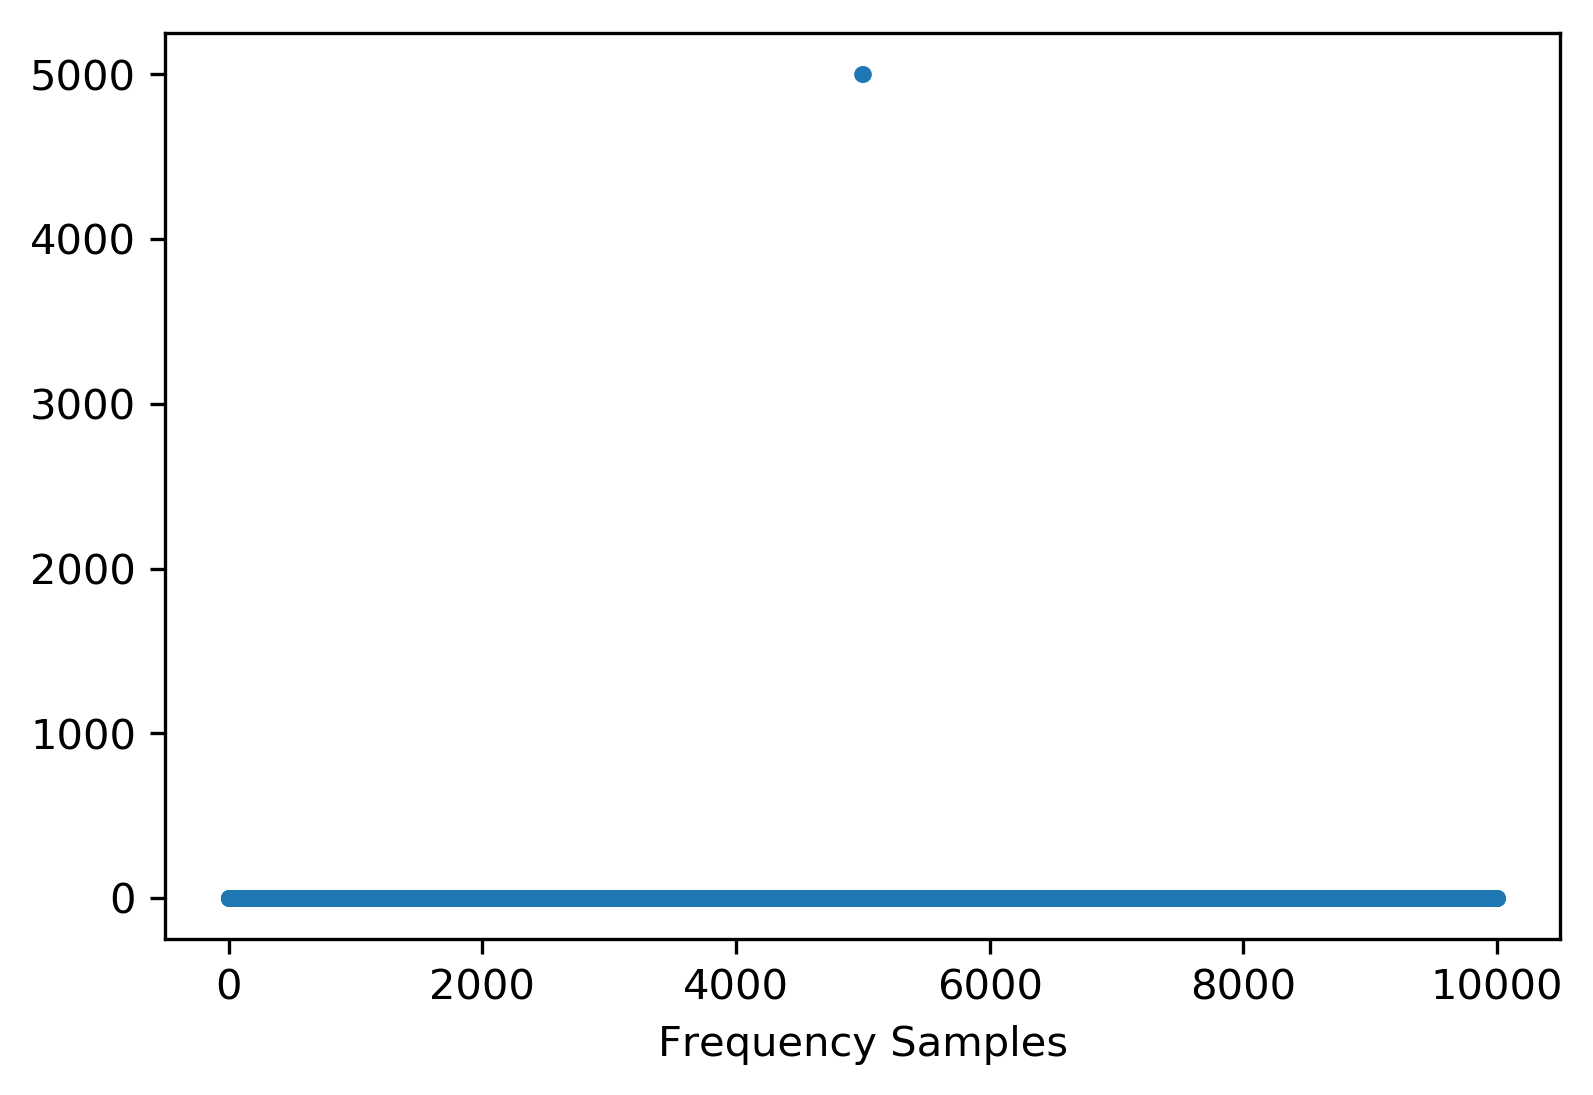

In [11]:
plt.plot(np.abs(np.fft.fftshift(Fyz)),'.')
plt.xlabel('Frequency Samples');

# Aliasing

(0, 100)

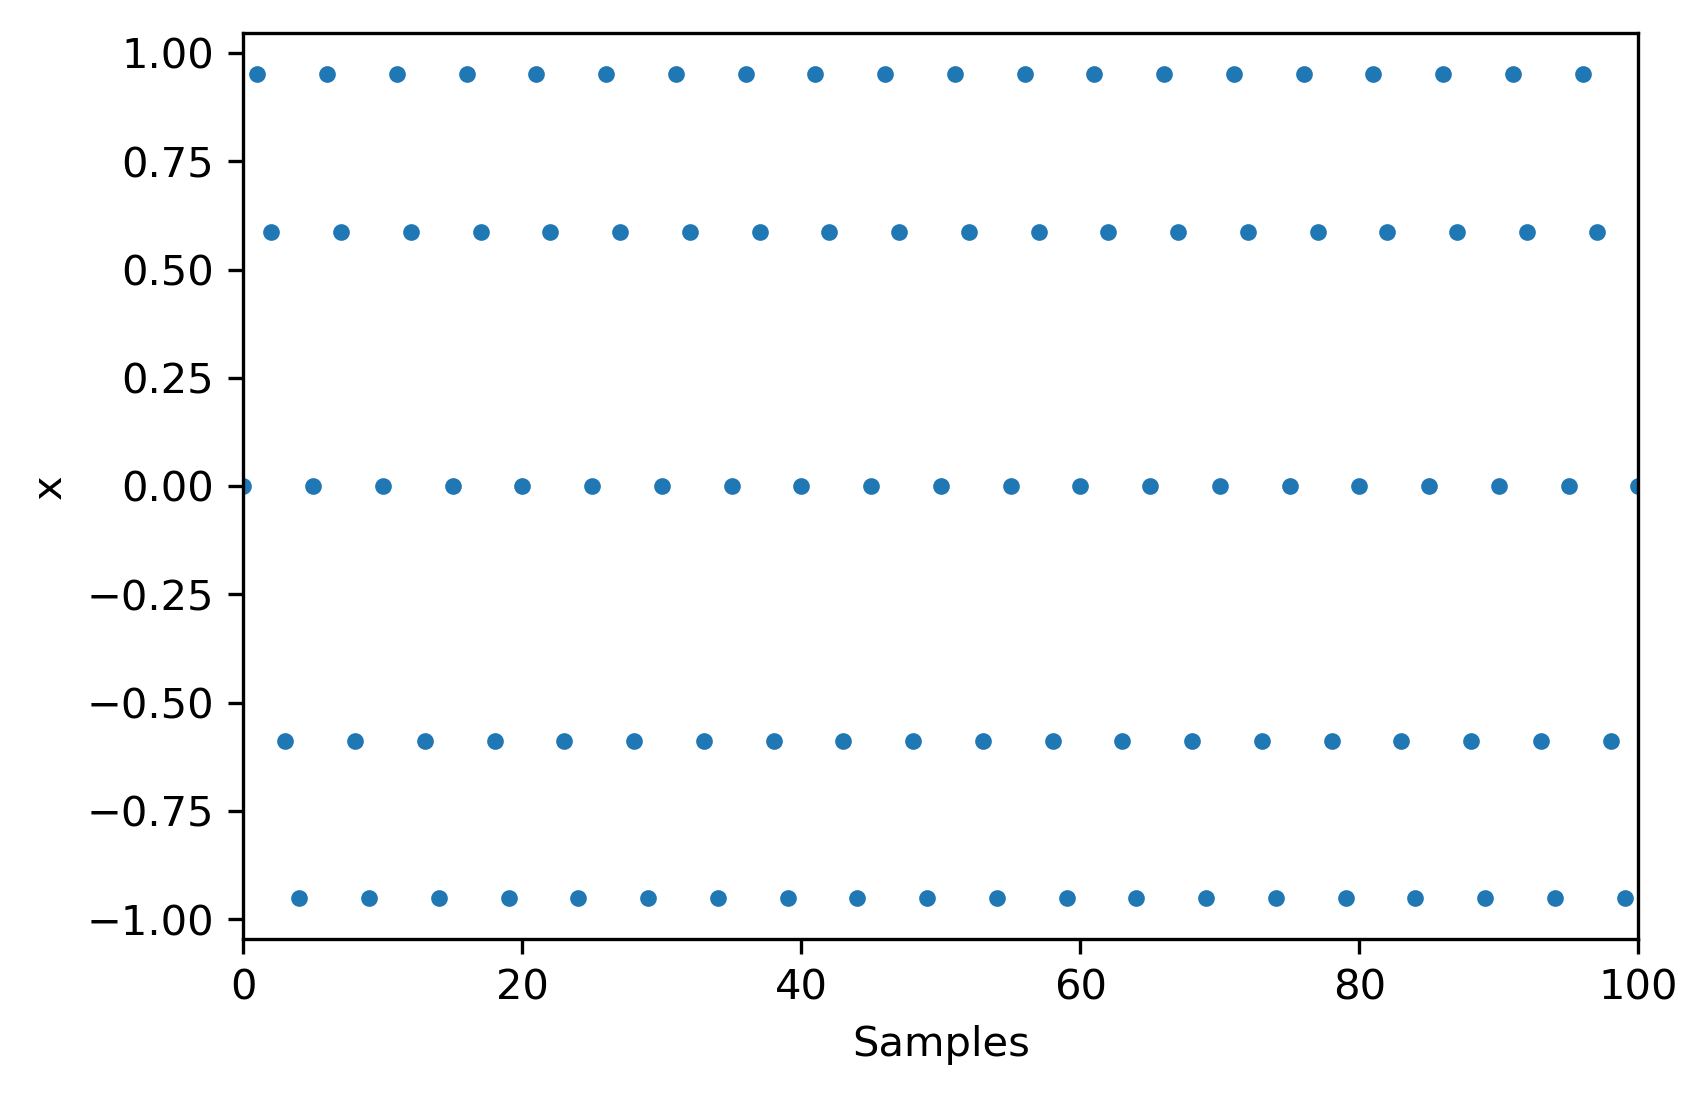

In [14]:
f = 12000 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1
x = np.arange(sample)
y = amplitude*np.sin(2 * np.pi * f * x / sample)
plt.plot(x, y,'.')
plt.xlabel('Samples')
plt.ylabel('x');
plt.xlim([0,100])

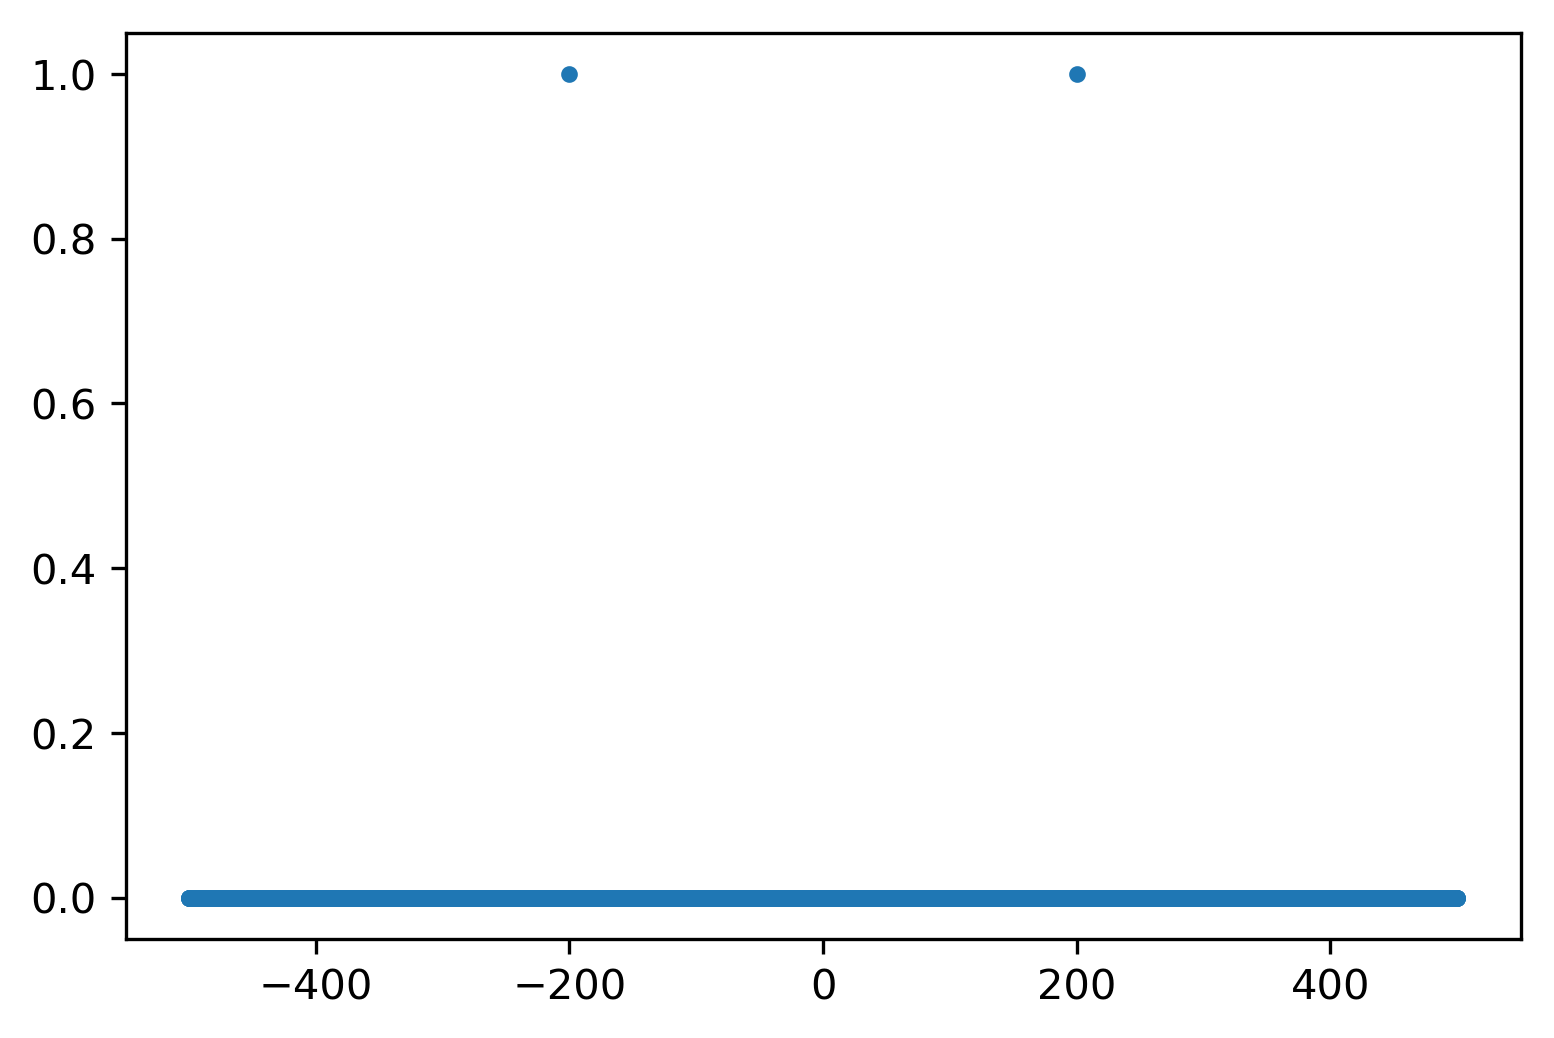

In [15]:
Fy = np.fft.fft(y)/(sample/2)
Fyf = np.fft.fftfreq(sample,d=timestep) #Calculate the frequency steps
plt.plot(Fyf,np.abs(Fy),'.');

# Limitations of DFTs

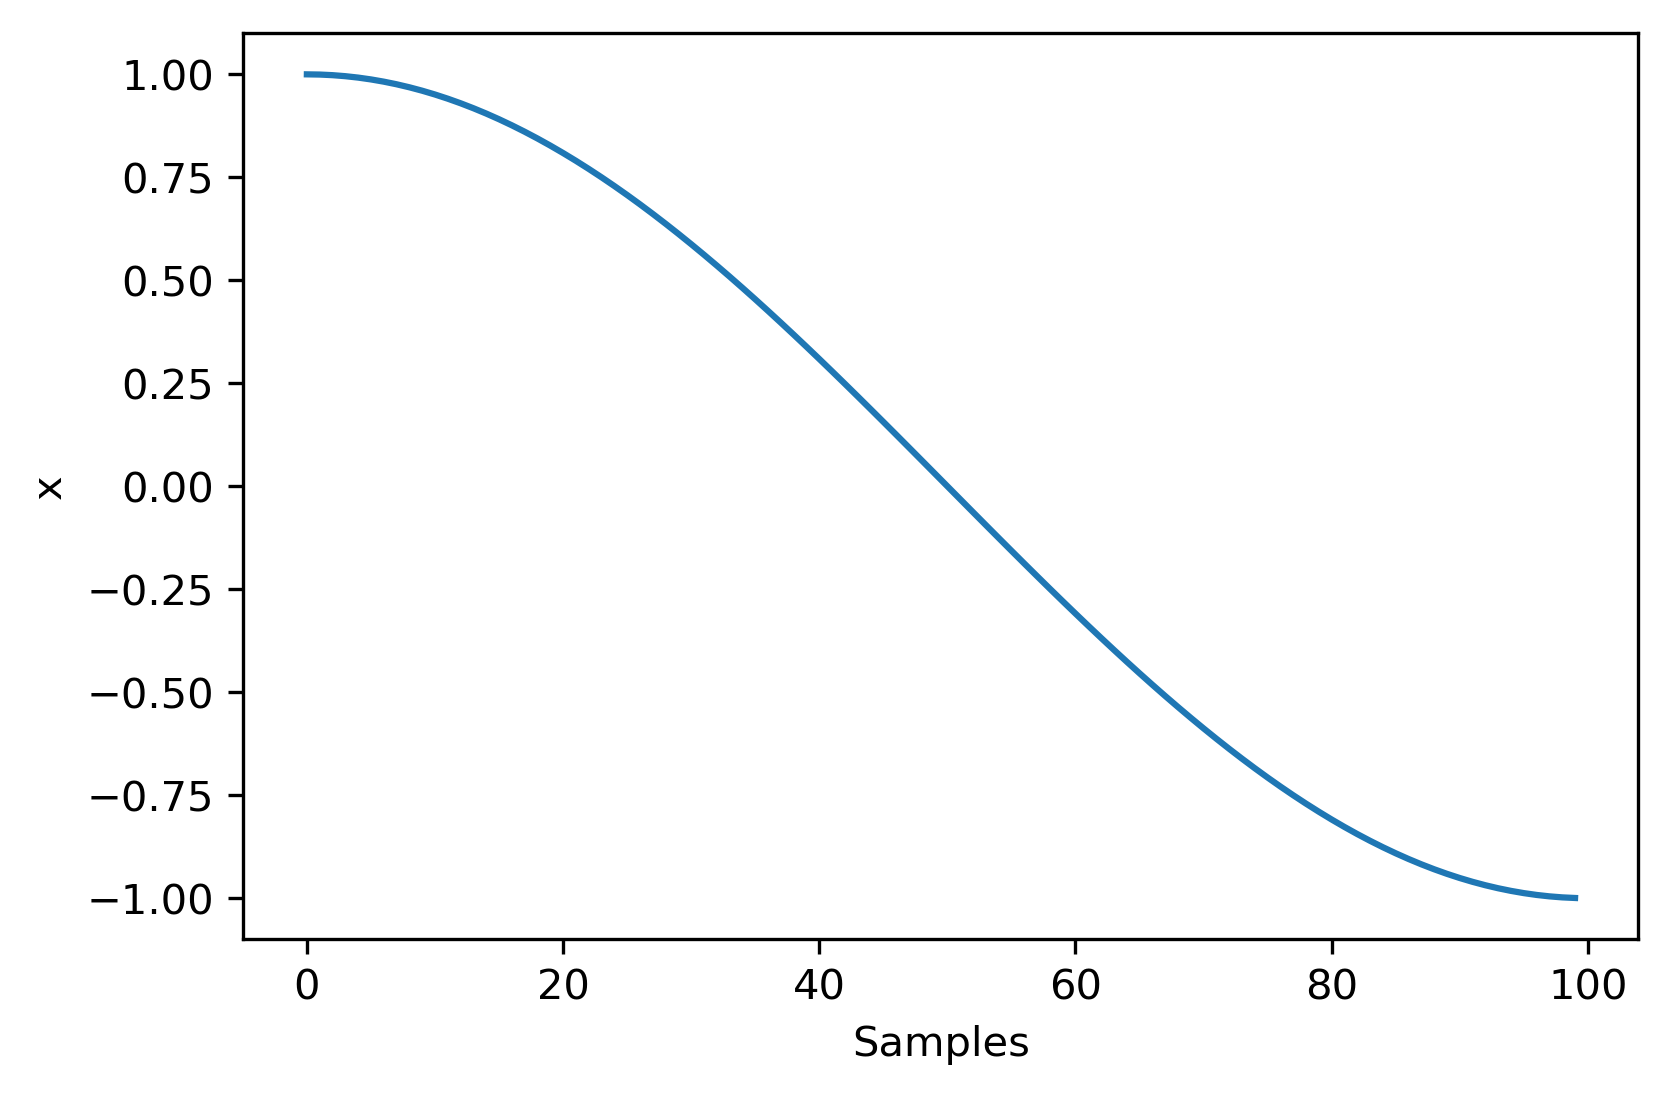

In [17]:
f = 0.5# Number of periods in one data sample
sample = 100 # Number of samples
timestep = 0.1 # Time step in seconds
amplitude = 1
x = np.arange(sample)
y = amplitude*np.sin(2 * np.pi * f * x / sample + np.pi/2.0)
plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('x');

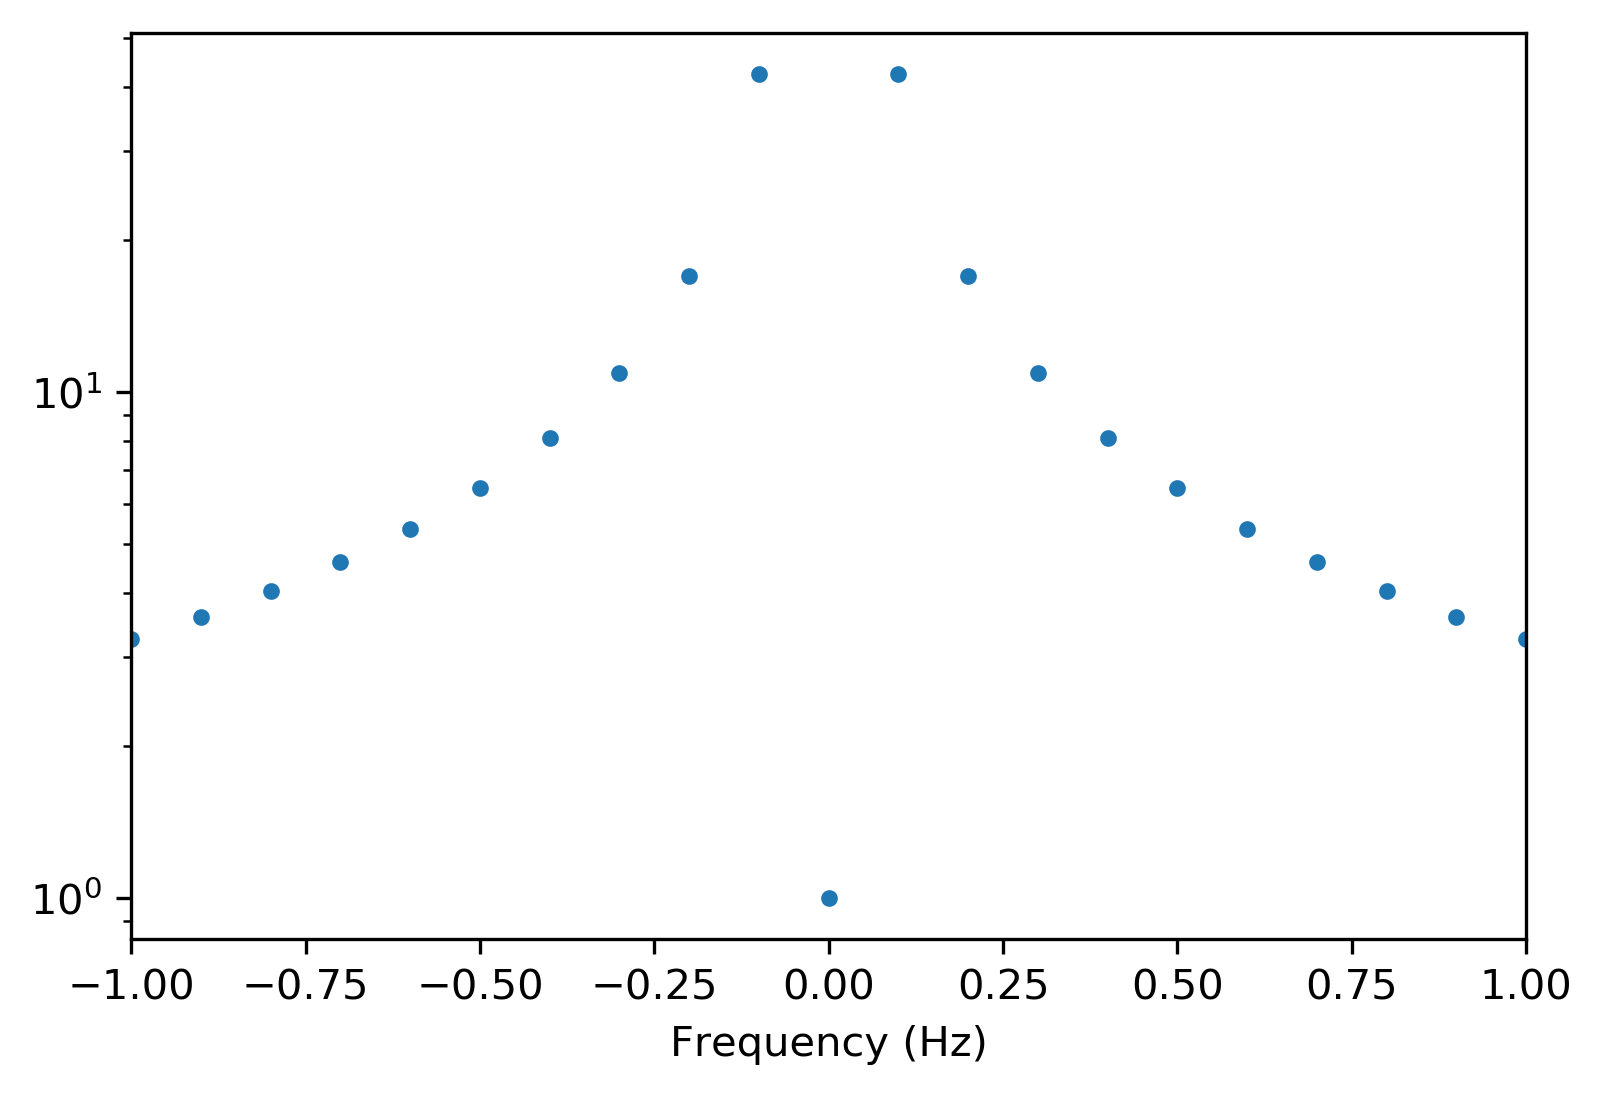

In [18]:
Fy = np.fft.fft(y)
Fyf = np.fft.fftfreq(sample,d=timestep)
plt.plot(Fyf,np.abs(Fy),'.')
plt.xlabel('Frequency (Hz)');
plt.xlim([-1,1])
plt.yscale('log')

# 2D DFTs

(200, 200)


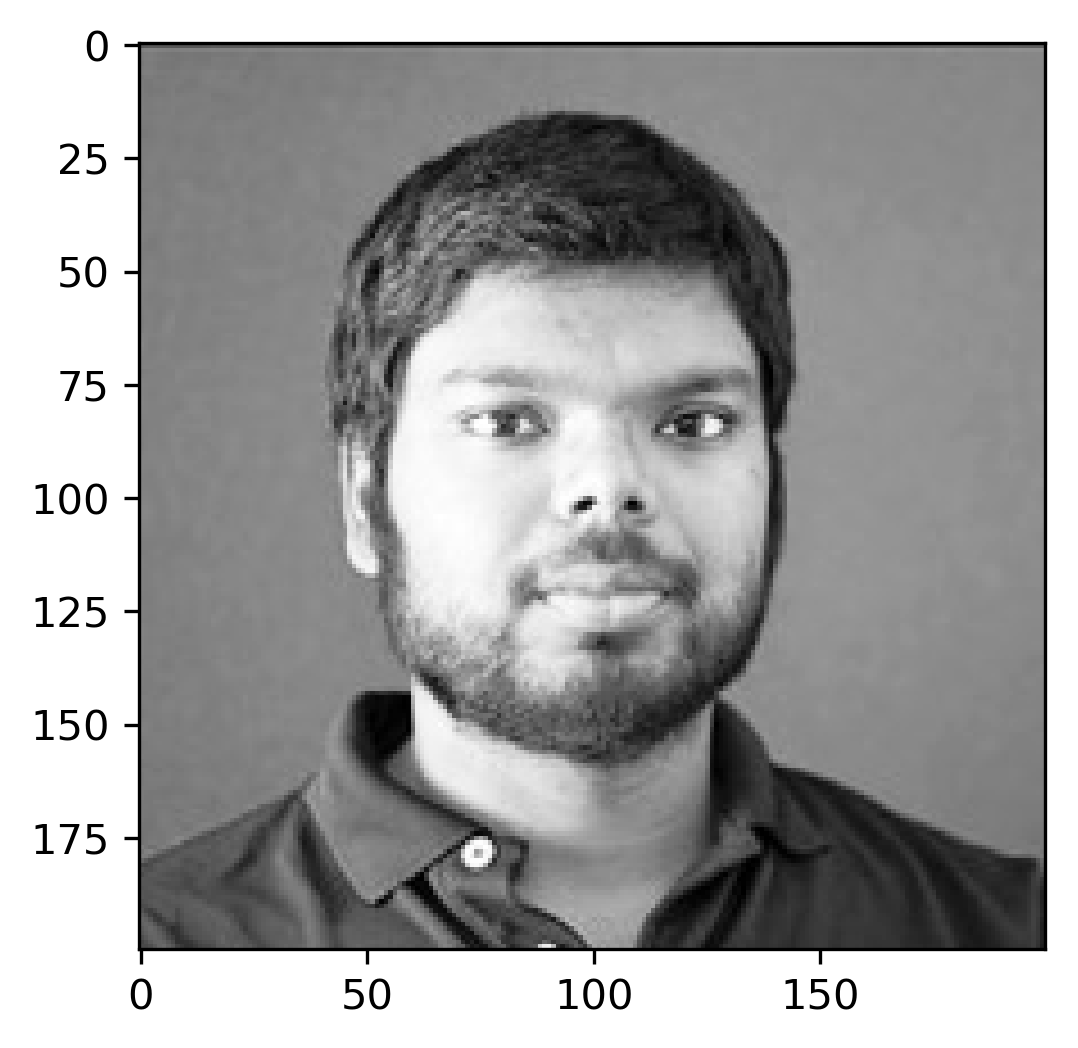

In [19]:
im = Image.open('Suresh.jpg')
I = np.asarray(im)[:,:,0]
plt.imshow(I, cmap='Greys_r');
print(I.shape)

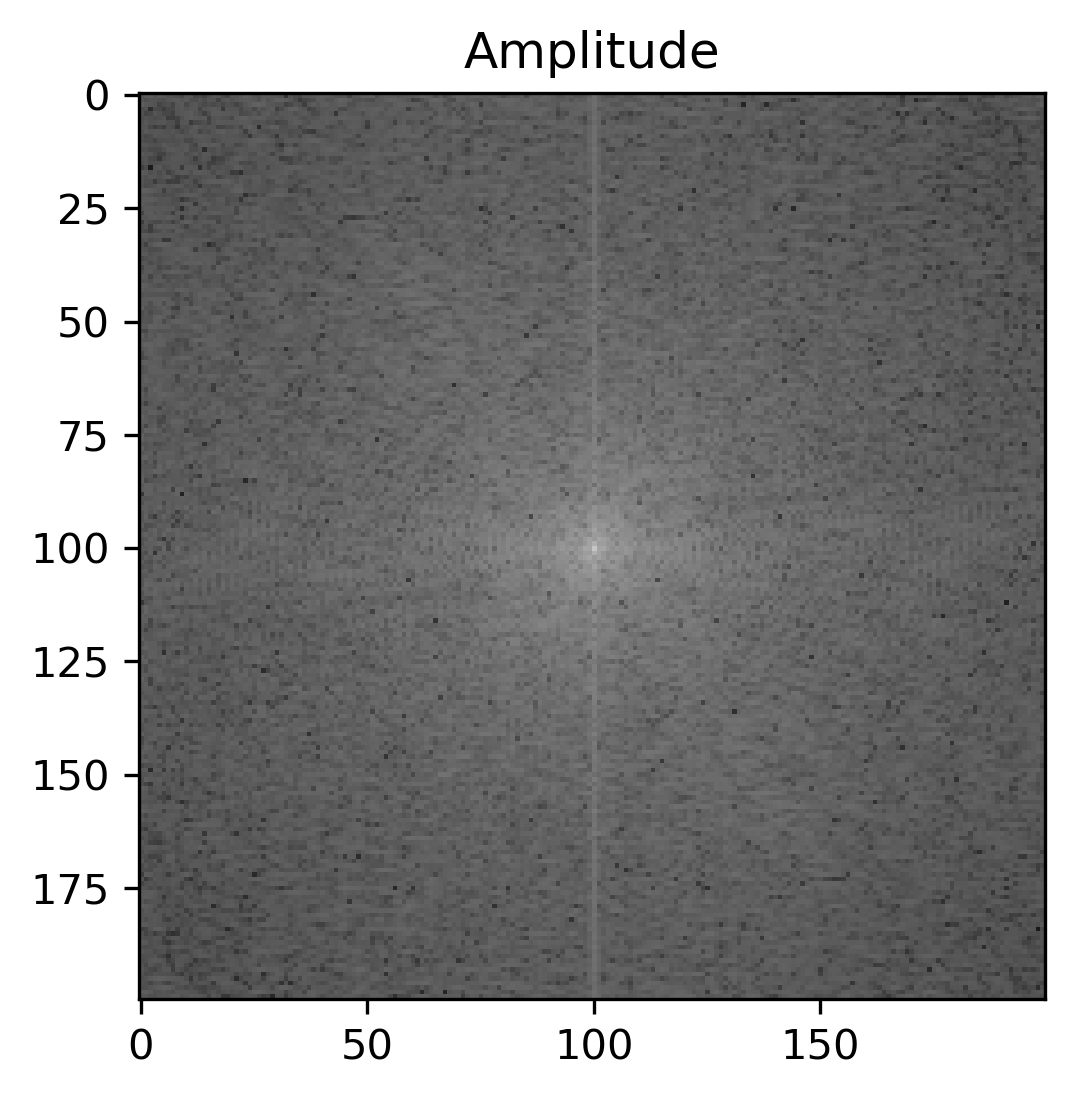

In [20]:
FI = np.fft.fft2(I)
amplitude = np.abs(np.fft.fftshift(FI))
plt.imshow(np.log10(amplitude),cmap='Greys_r')
plt.clim([0,10])
plt.title('Amplitude');

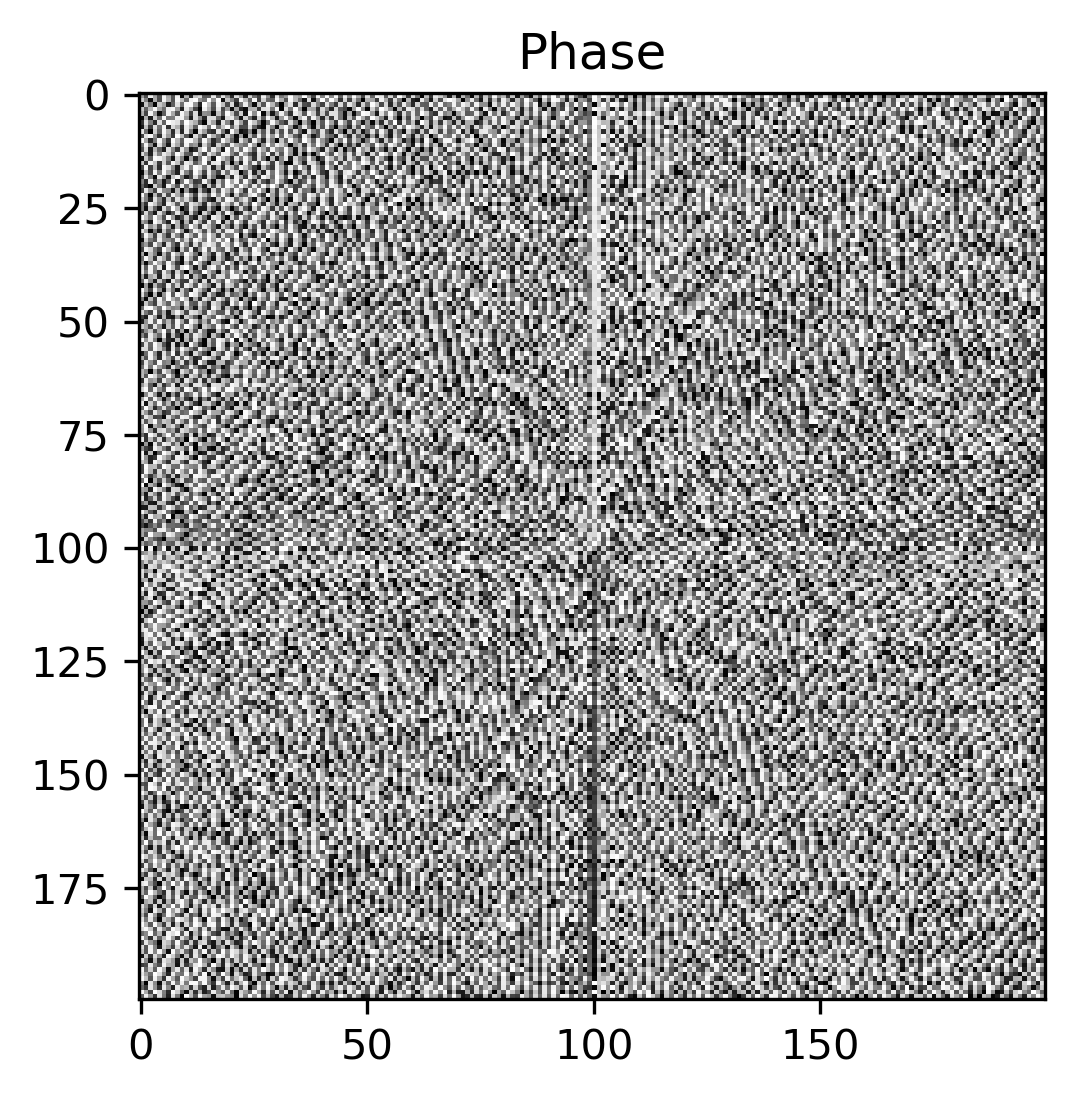

In [21]:
phase = np.angle(np.fft.fftshift(FI))
plt.imshow(phase,cmap='Greys_r');
plt.clim([-1*np.pi,np.pi])
plt.title('Phase');

# Polar Coordinates

We can write the complex number in polar coordinates: $I(f_x,f_y) = A(f_x,f_y)\exp^{i\Phi(f_x,f_y)}$.

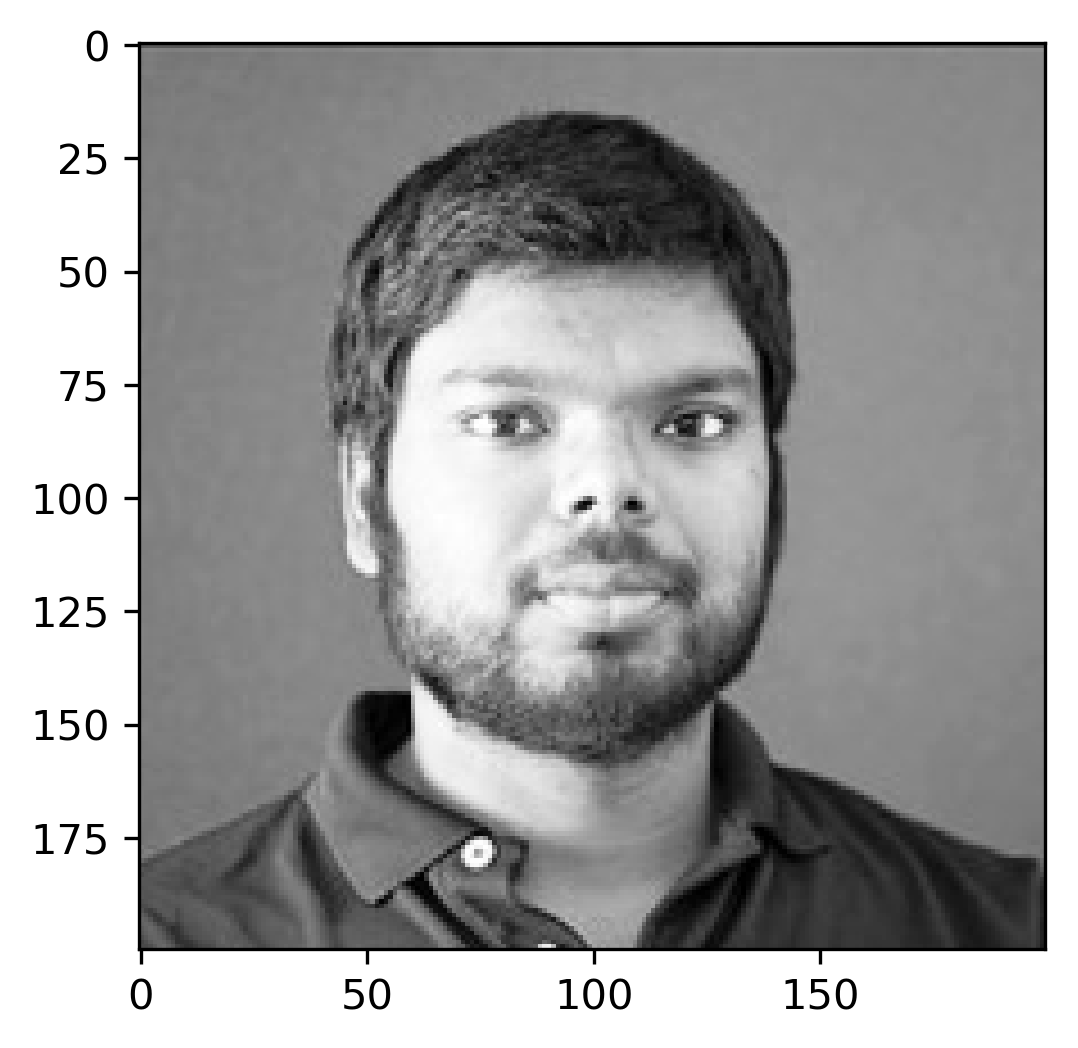

In [22]:
newFI = amplitude*np.exp(1j*phase)
img = np.fft.ifft2(newFI)
plt.imshow(np.abs(img),cmap='Greys_r');

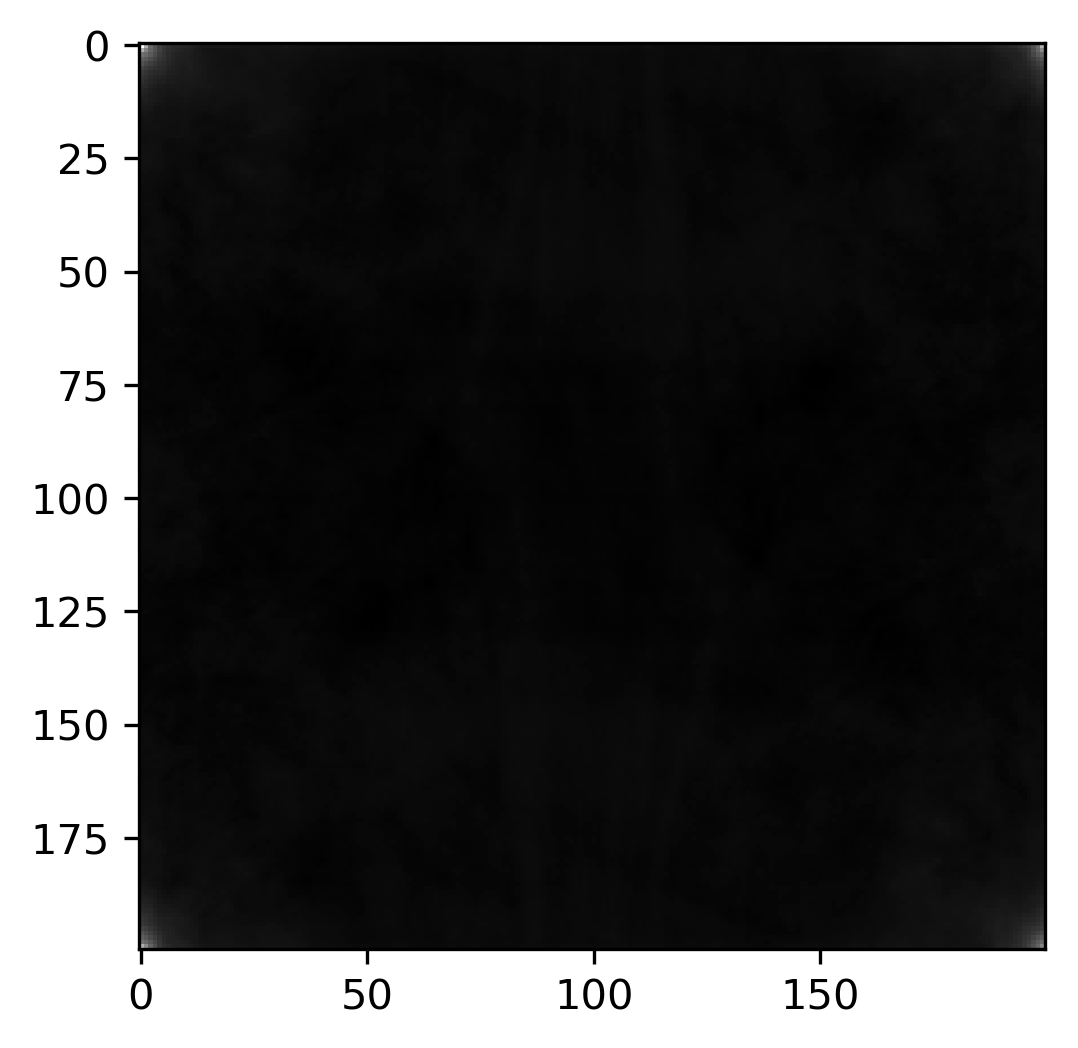

In [23]:
newFI = amplitude
img = np.fft.ifft2(newFI)
plt.imshow(np.abs(img),cmap='Greys_r');

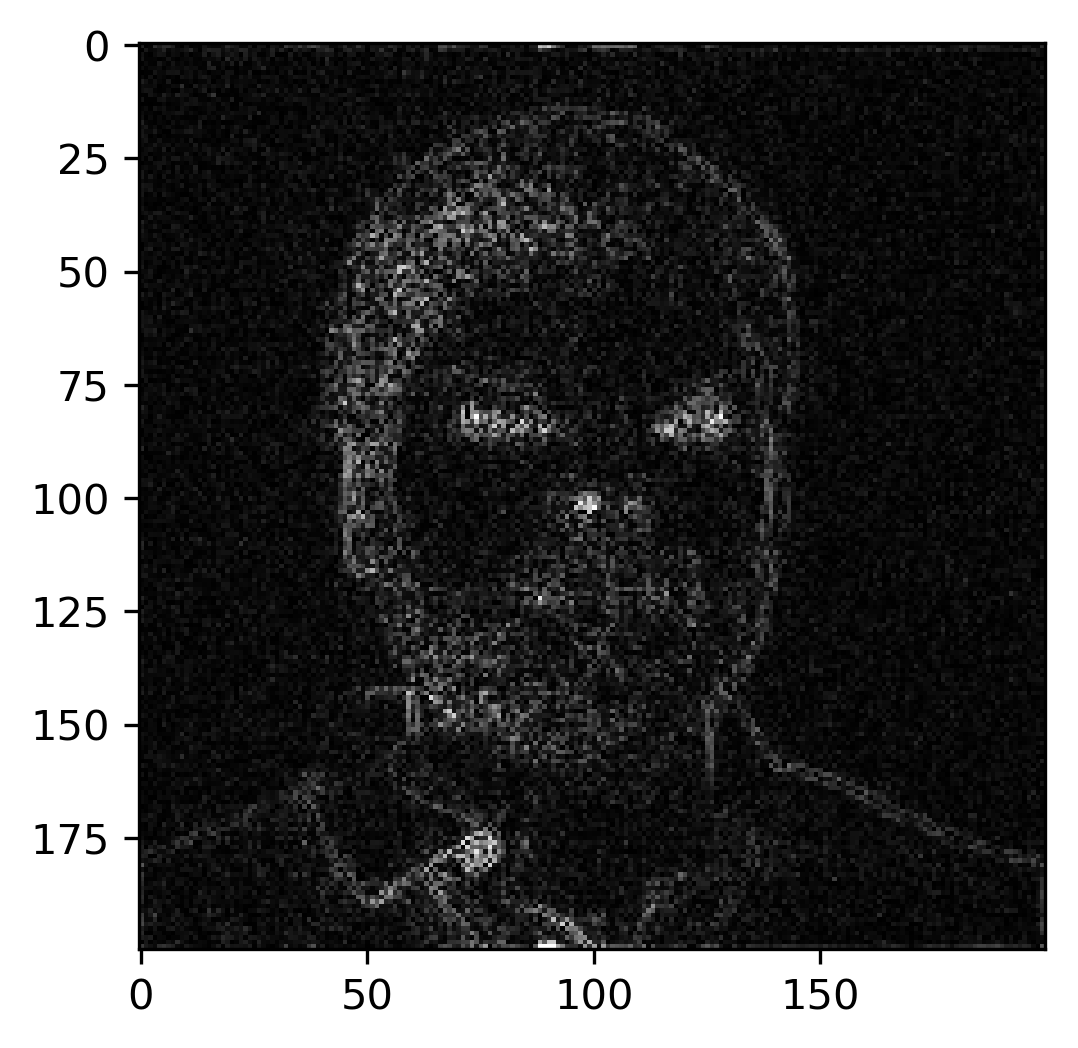

In [24]:
newFI = 1.0*np.exp(1j*phase)
img = np.fft.ifft2(newFI)
plt.imshow(np.abs(img),cmap='Greys_r')
plt.clim([0,0.05])

# Low Pass Filter

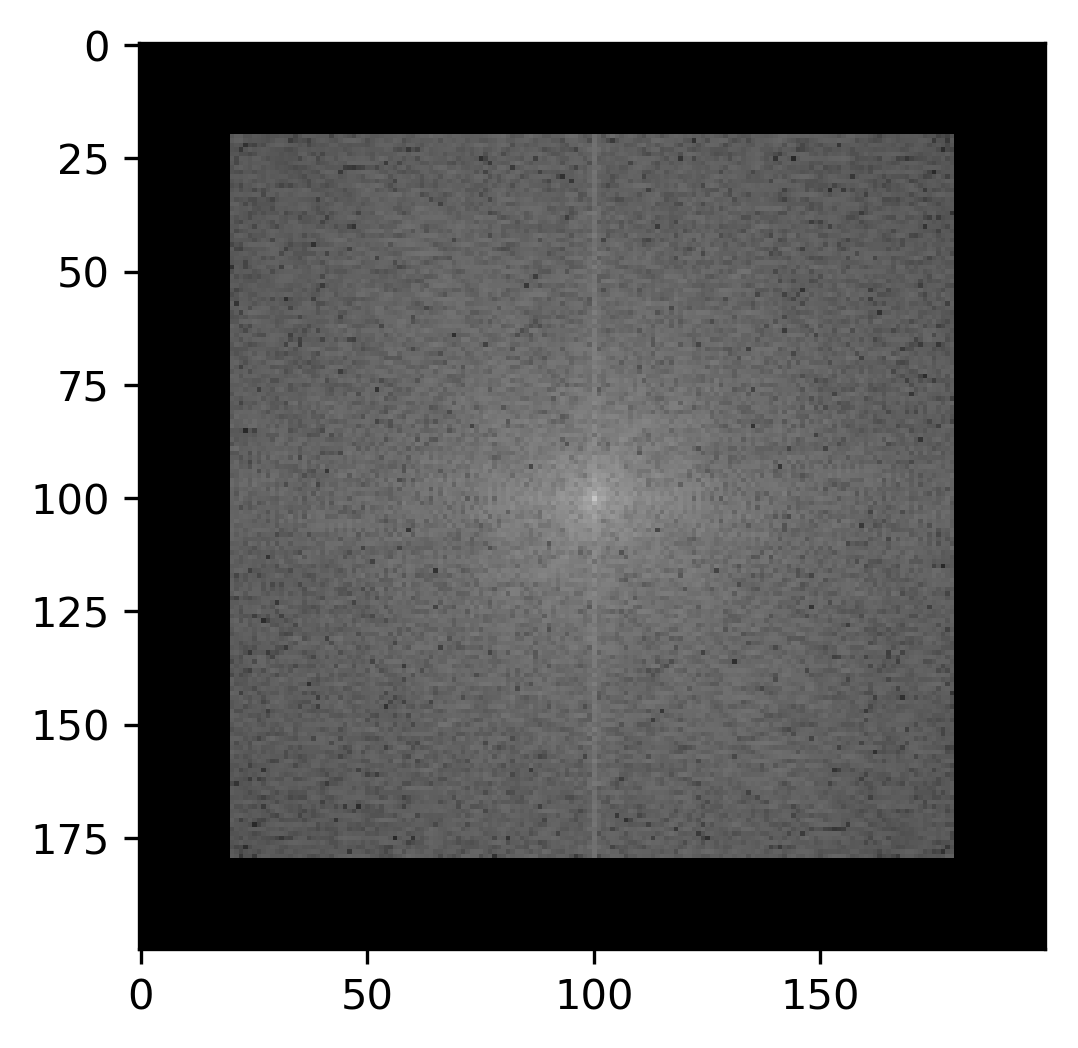

In [27]:
box = 20 #Choose a value less than 100
amplitude = np.abs(np.fft.fftshift(FI))
phase = np.angle(np.fft.fftshift(FI))
amplitude[0:box,0:200] = 0
amplitude[0:200,0:box] = 0
amplitude[200-box:200,0:200] = 0
amplitude[0:200,200-box:200] = 0
phase[0:box,0:200] = 0
phase[0:200,0:box] = 0
phase[200-box:200,0:200] = 0
phase[0:200,200-box:200] = 0
epsilon = 0.000001 # To help with log plot
plt.imshow(np.log10(amplitude+epsilon),cmap='Greys_r')
plt.clim([0,10])

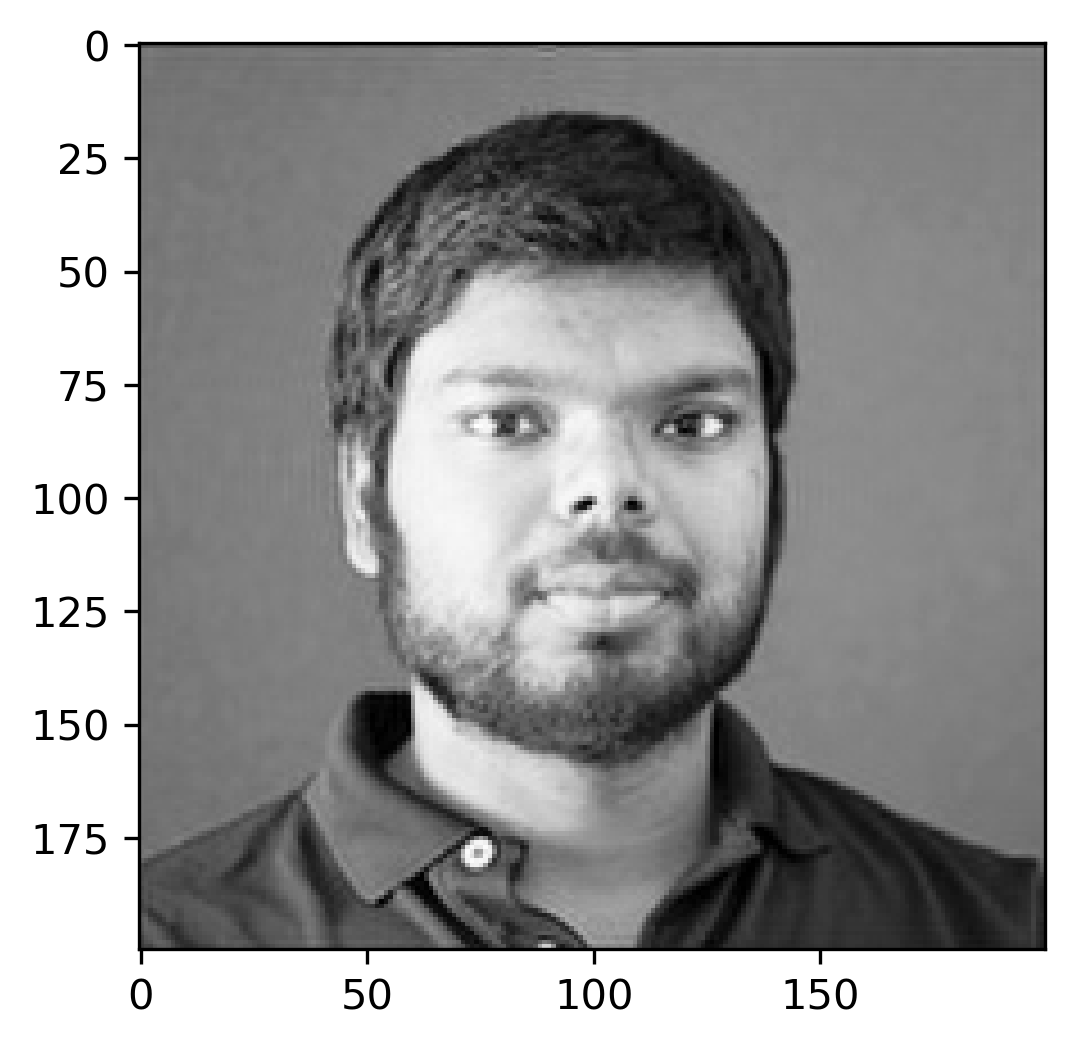

In [28]:
newFI = amplitude*np.exp(1j*phase)
img = np.fft.ifft2(newFI)
plt.imshow(np.abs(img),cmap='Greys_r');

# High Pass Filter

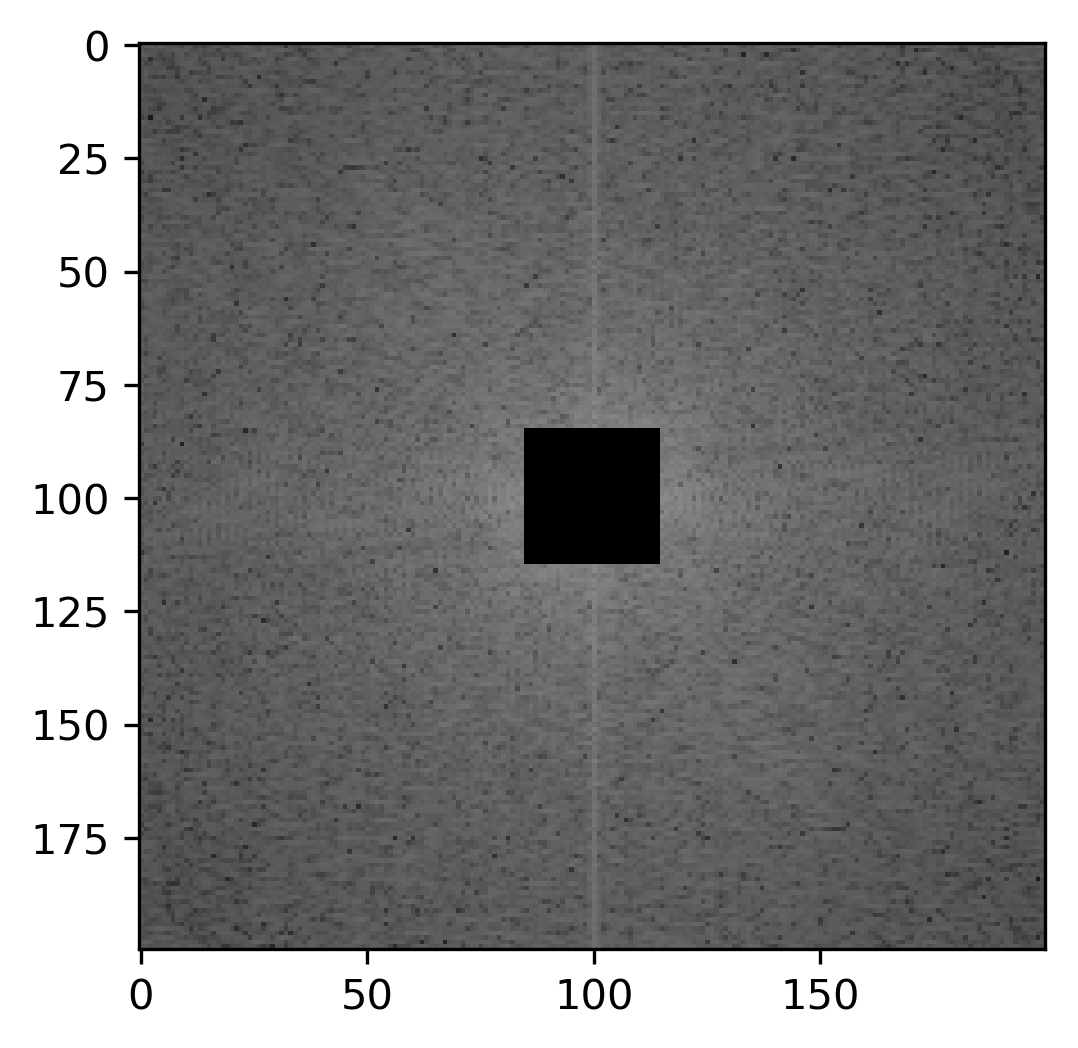

In [29]:
box = 30 #Choose a value less than 100
amplitude = np.abs(np.fft.fftshift(FI))
phase = np.angle(np.fft.fftshift(FI))
amplitude[100-box/2:100+box/2,100-box/2:100+box/2] = 0
phase[100-box/2:100+box/2,100-box/2:100+box/2] = 0
epsilon = 0.000001 # To help with log plot
plt.imshow(np.log10(amplitude+epsilon),cmap='Greys_r')
plt.clim([0,10])

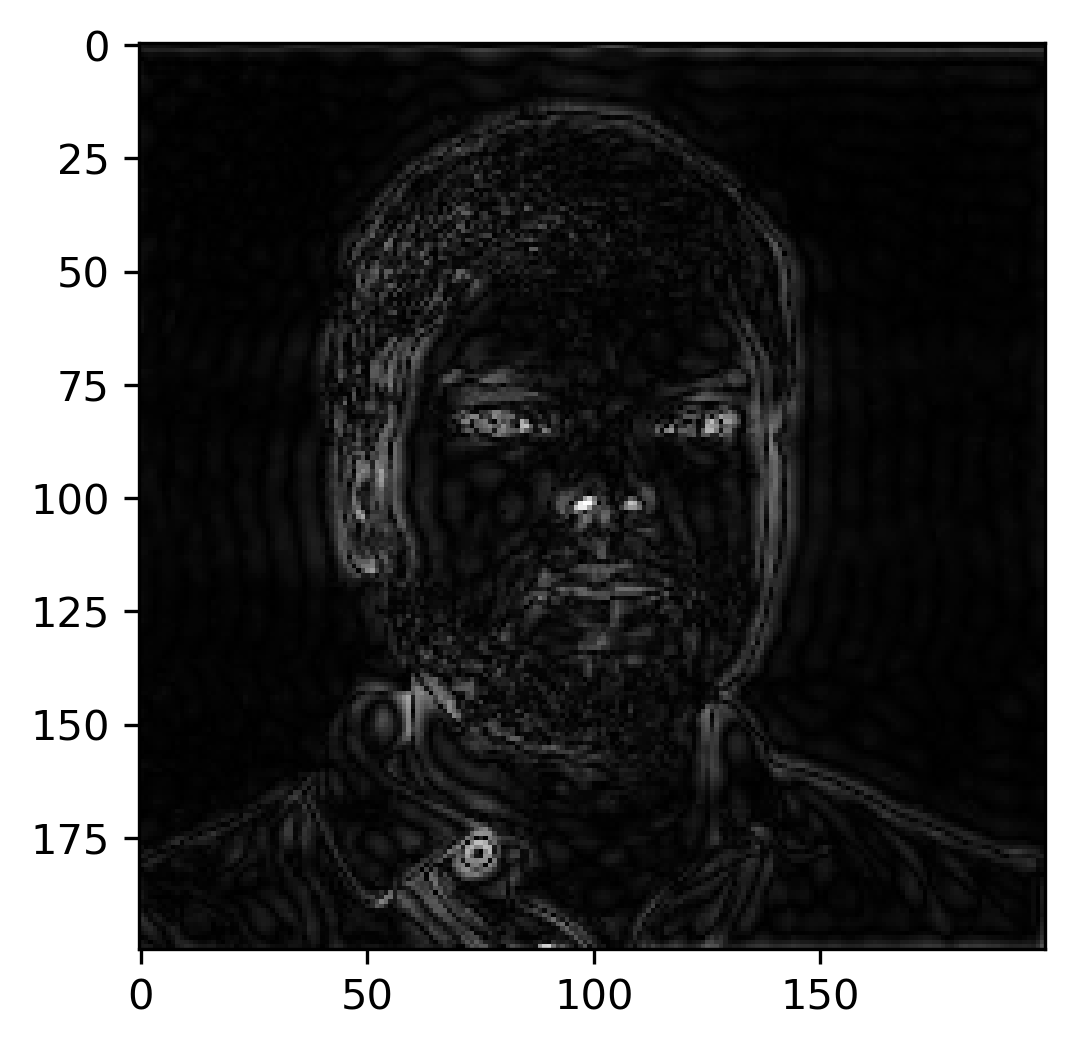

In [30]:
newFI = amplitude*np.exp(1j*phase)
img = np.fft.ifft2(newFI)
plt.imshow(np.abs(img),cmap='Greys_r');

# Convolution

In [31]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

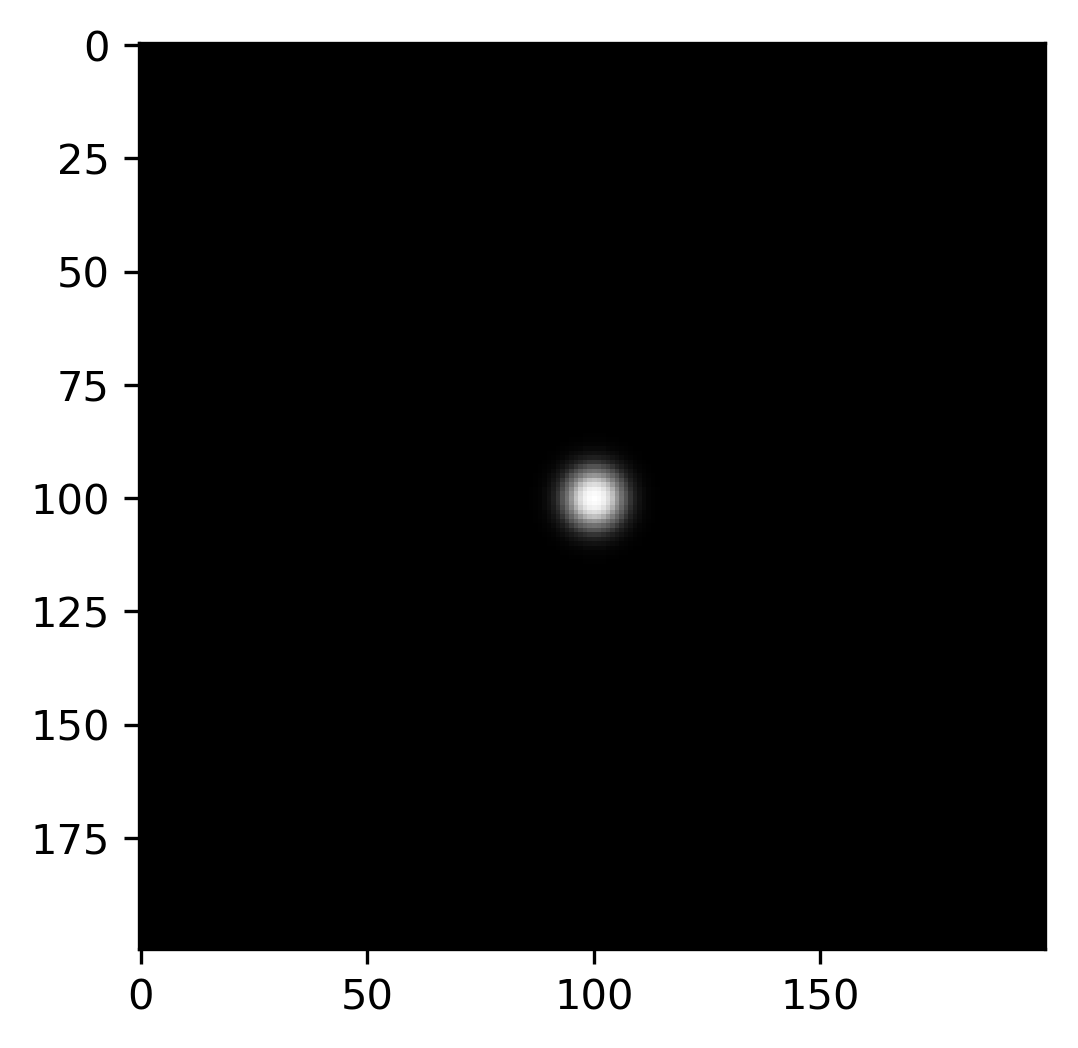

In [34]:
kernel = makeGaussian(200,fwhm=10,center=[100,100])
plt.imshow(kernel,cmap='Greys_r');

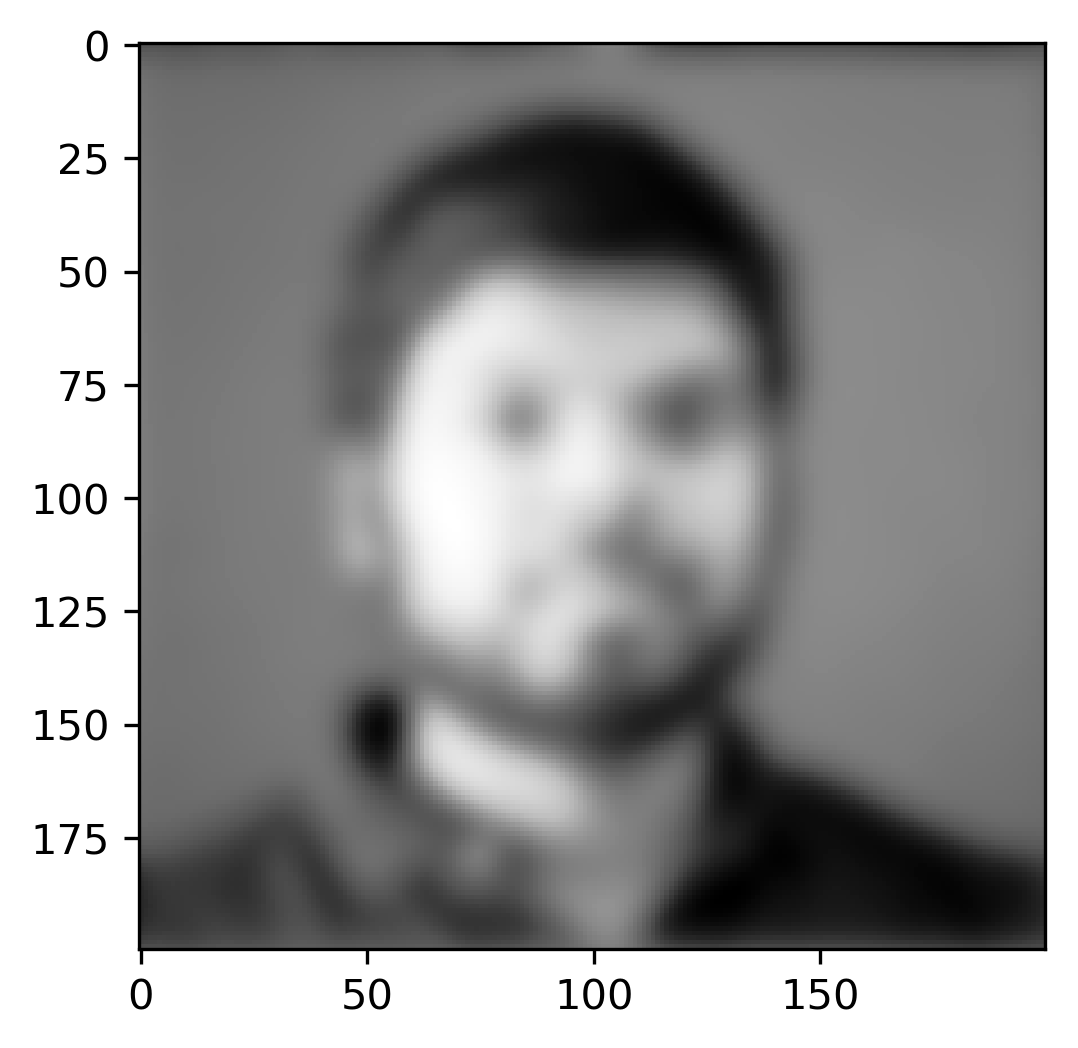

In [35]:
FI = np.fft.fft2(I)
KI = np.fft.fft2(kernel)
convI = np.fft.fftshift(np.fft.ifft2(FI*KI))
plt.imshow(np.abs(convI),cmap='Greys_r');

# Far-Field Diffraction

The far-field diffraction pattern can be estimated by knowing the value of the electric field, $E(x,y)$ of the EM wave at the pupil of an optical system. The electric field is a complex number but can be modeled using the polar coordinate system where $A$ is the amplitude and $\Phi$ is the phase of the EM wave. Therefore $E(x,y)$ can be written to be $E(x,y) = A(x,y)\exp^{i\Phi(x,y)}$. In the case of a perfect optical system with light coming from a distant source, $\Phi = 0$ and $A = constant$ within the aperture while $0$ everywhere else. Remember that when we take an image, we measure the intensity $I$ where $I(x,y) = |E(x,y)|^2$. Let's model the diffraction pattern of a circular aperture below:

In [36]:
radius = 512
padding = 8192-2*radius
telescopepupil = np.zeros((2*radius+1+padding, 2*radius+1+padding))
phase = np.zeros((2*radius+1+padding, 2*radius+1+padding))/8000
y,x = np.ogrid[-radius-padding/2:radius+1+padding/2, -radius-padding/2:radius+1+padding/2]
pmask = (x**2 + y**2 <= radius**2)
telescopepupil[pmask] = 1
phase[np.logical_not(pmask)] = 0;

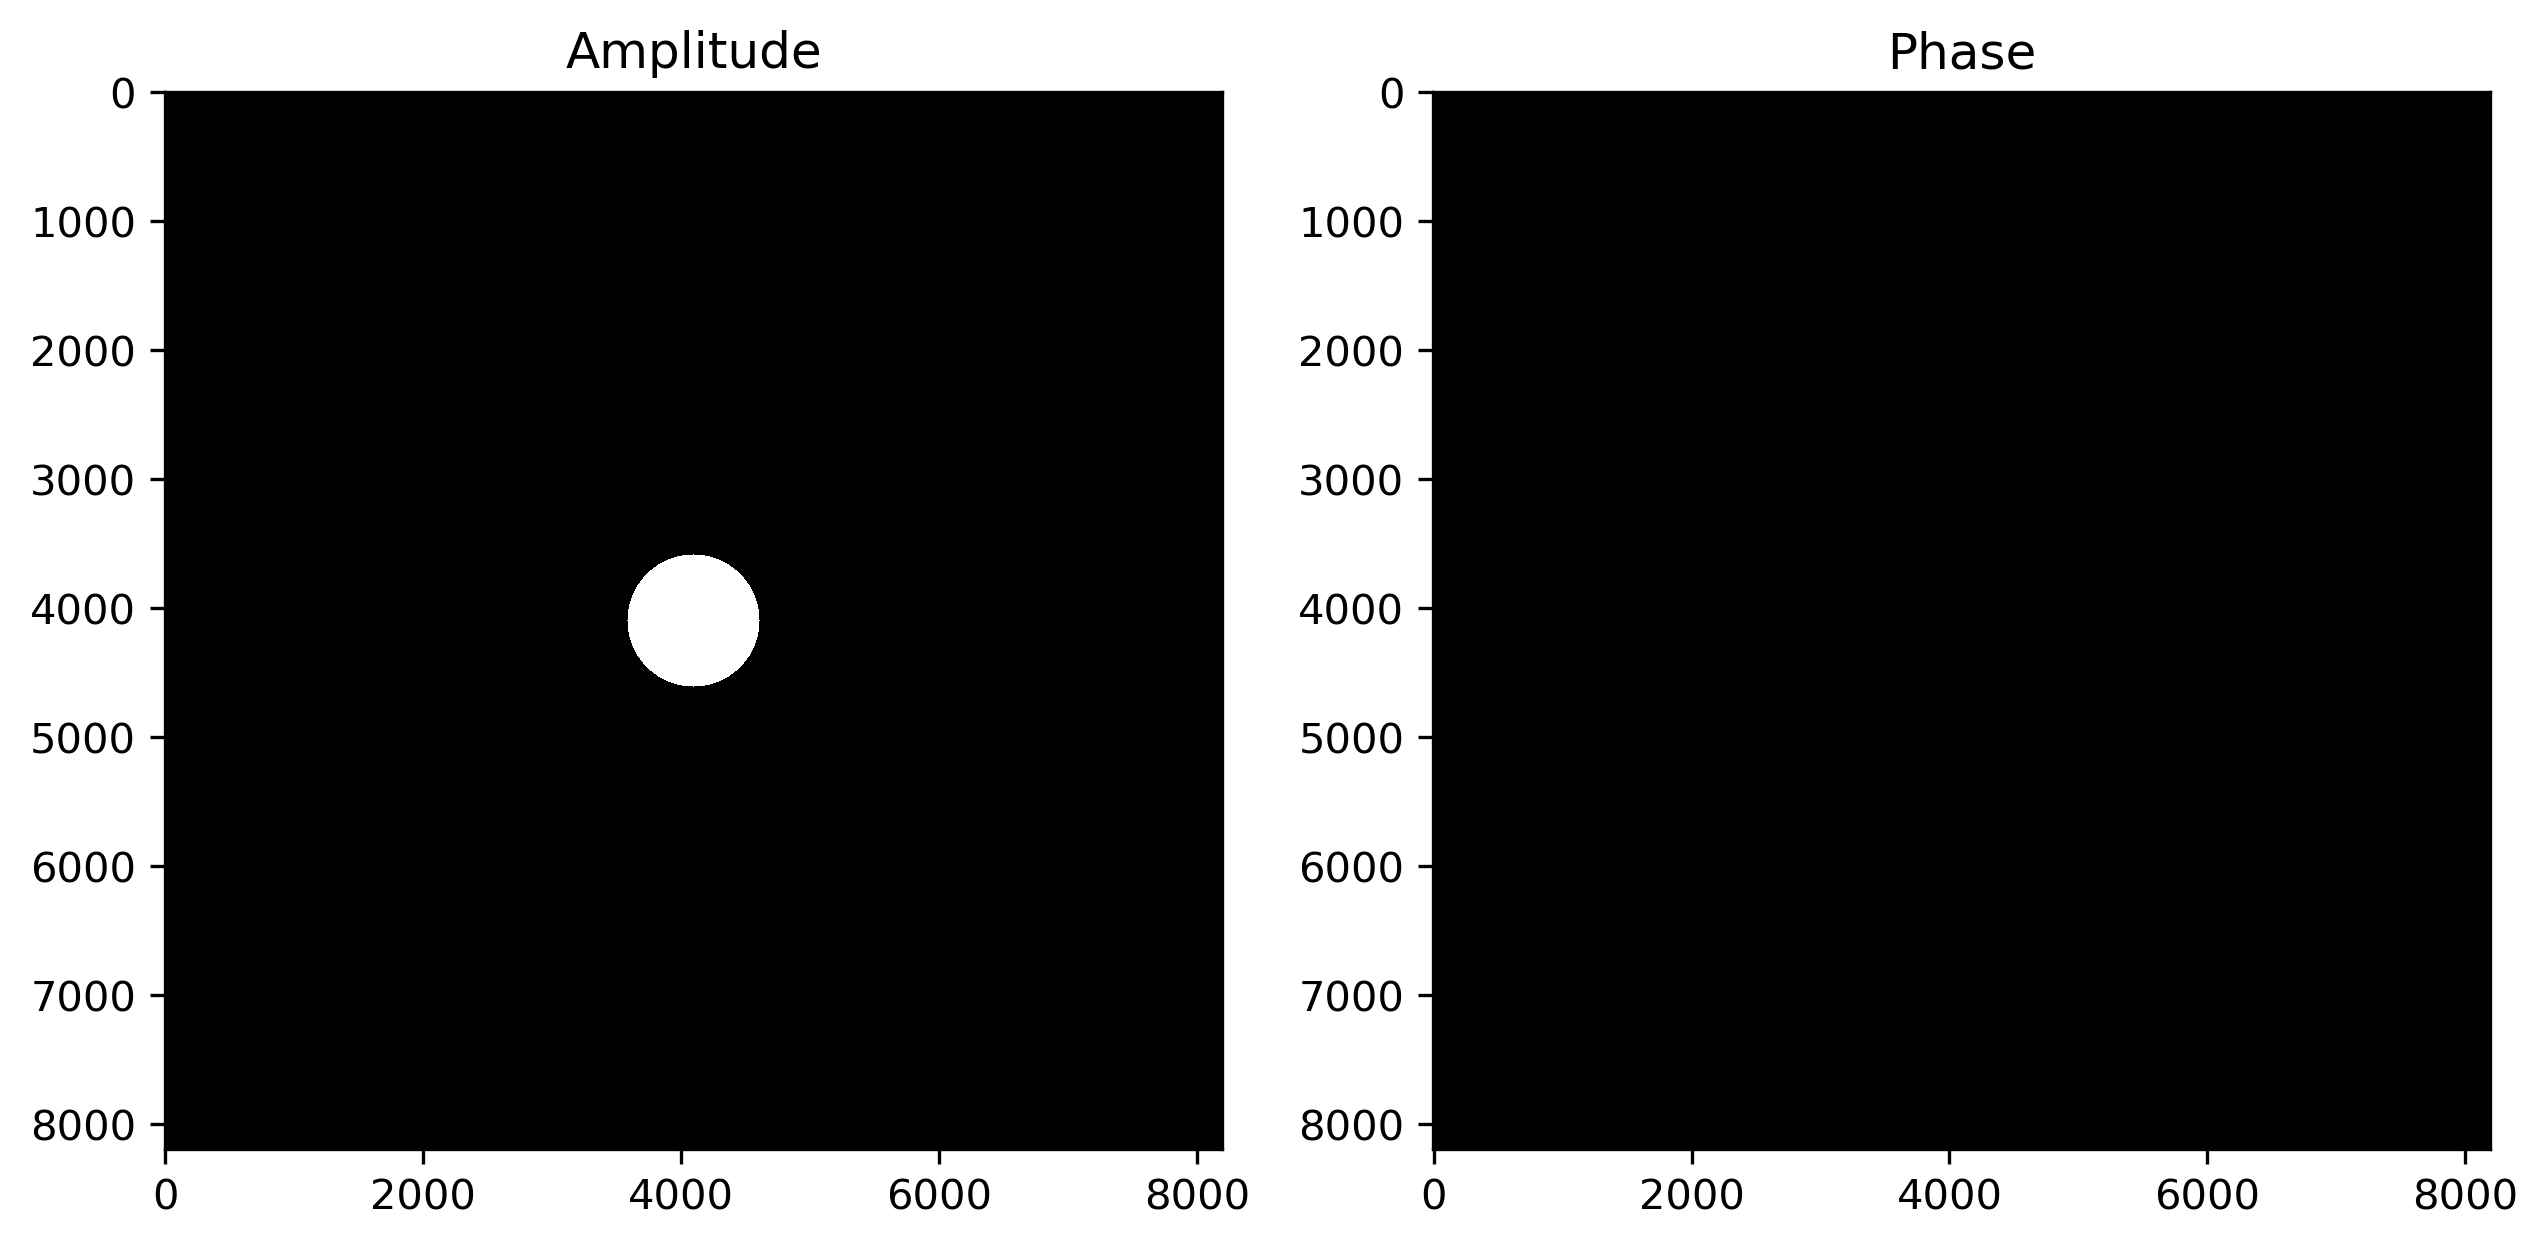

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(telescopepupil,cmap='Greys_r')
plt.title('Amplitude')
plt.subplot(1, 2, 2)
plt.imshow(phase,cmap='Greys_r')
plt.title('Phase');

**Optical Transfer Function** (OTF) is the Fourier transform of the electric field at the pupil.

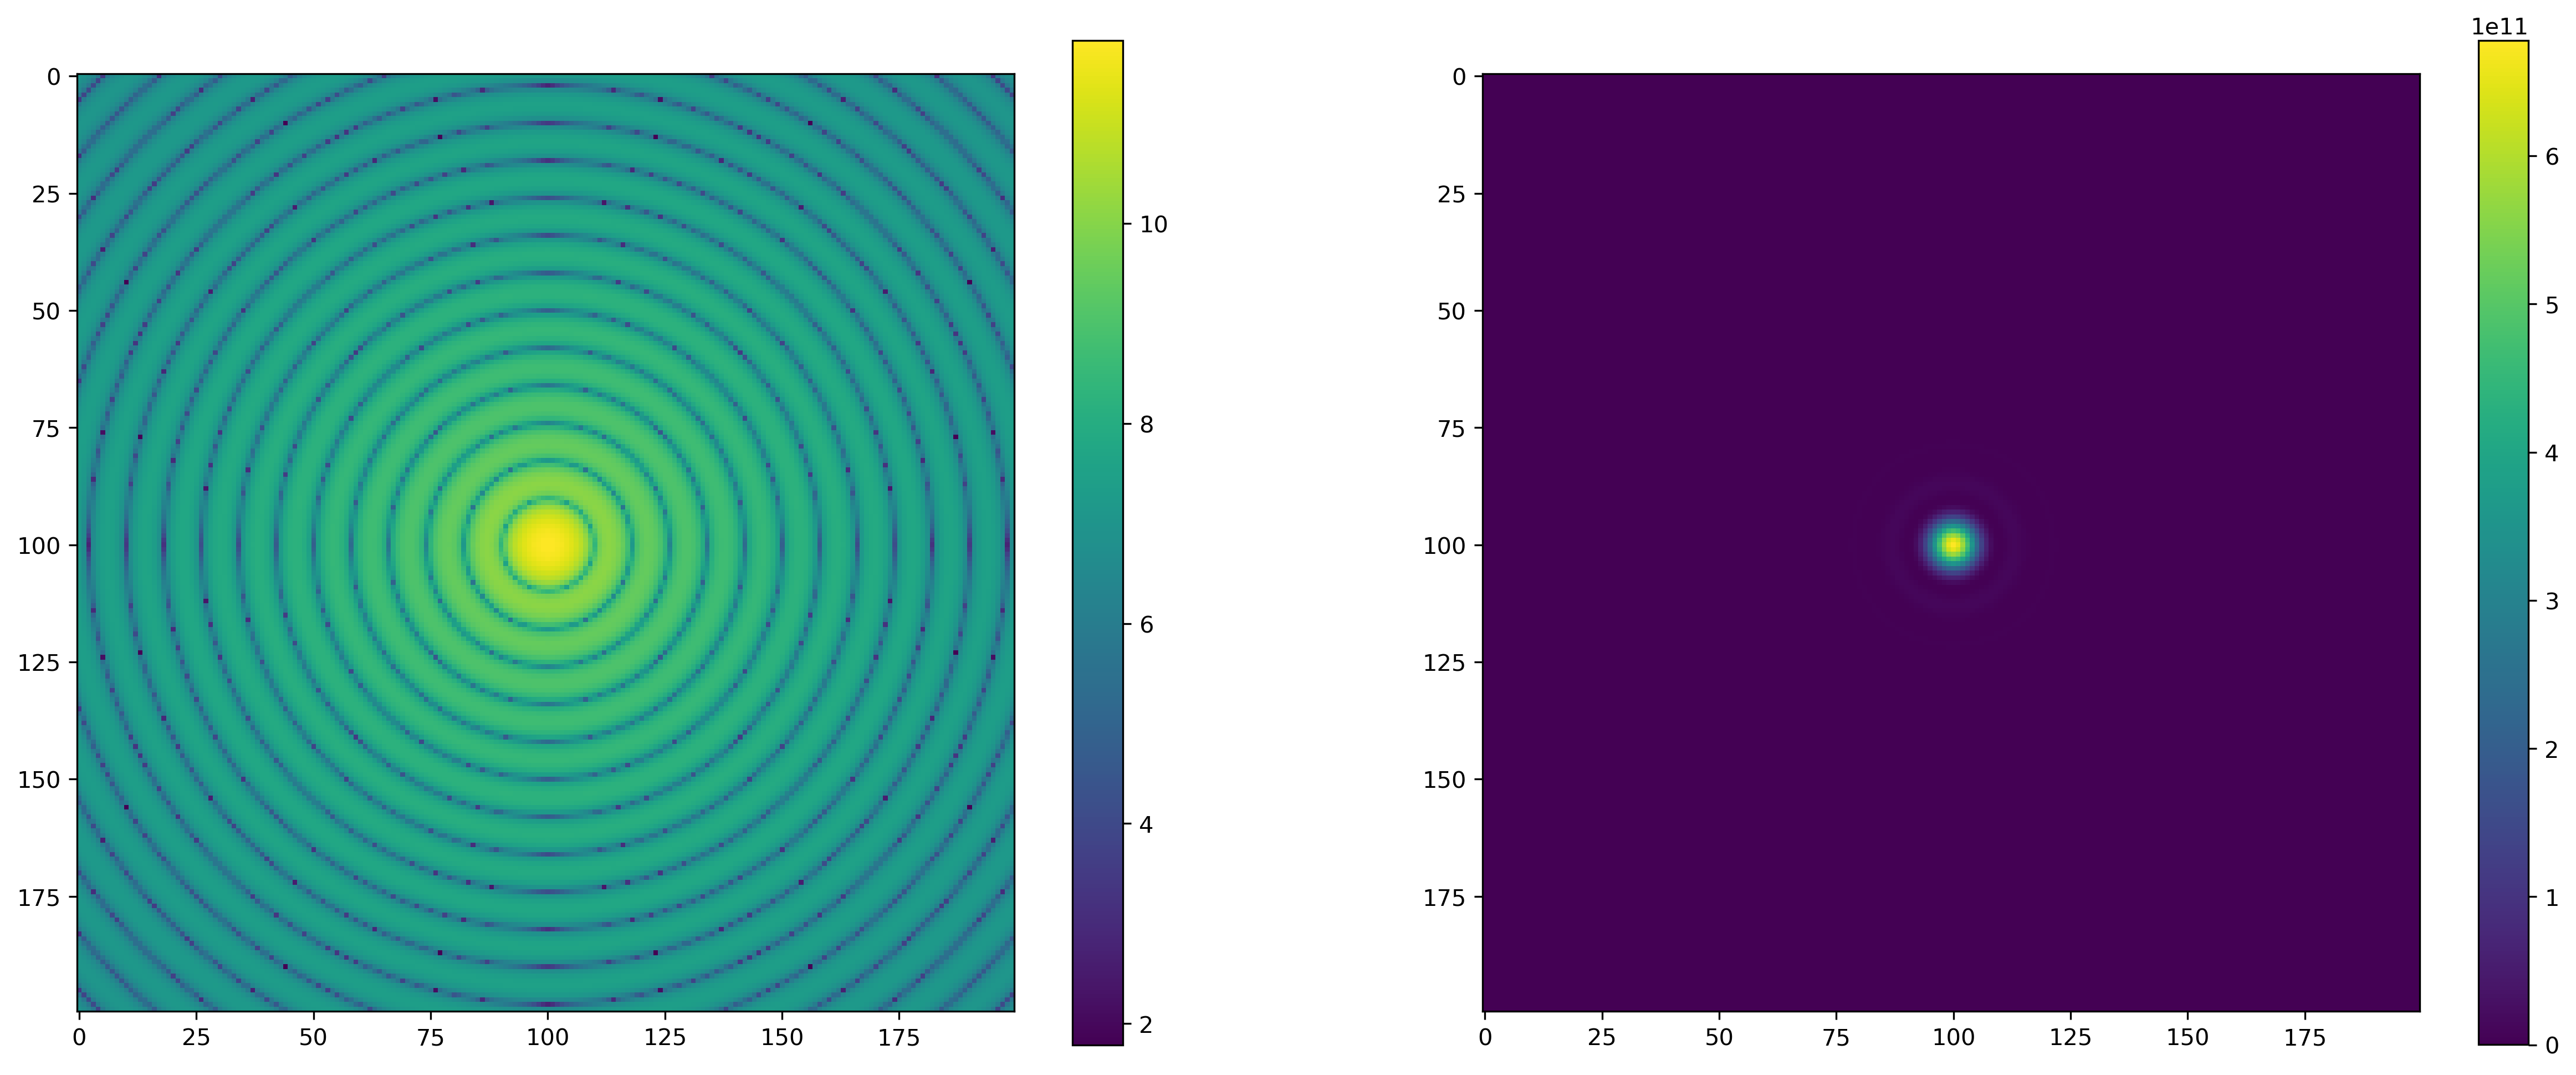

In [38]:
otf = np.fft.fftshift(np.fft.fft2(telescopepupil[0:8192,0:8192]*np.exp(-1j*phase[0:8192,0:8192])))
plt.figure(figsize=(20,8))
dx = 100
plt.subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(otf[int(radius+padding/2-dx):int(radius+padding/2+dx),int(radius+padding/2-dx):int(radius+padding/2+dx)])**2))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(otf[int(radius+padding/2-dx):int(radius+padding/2+dx),int(radius+padding/2-dx):int(radius+padding/2+dx)])**2)
plt.colorbar();

**The Point Spread Function** (PSF) is simply the $OTF\times OTF^*$.

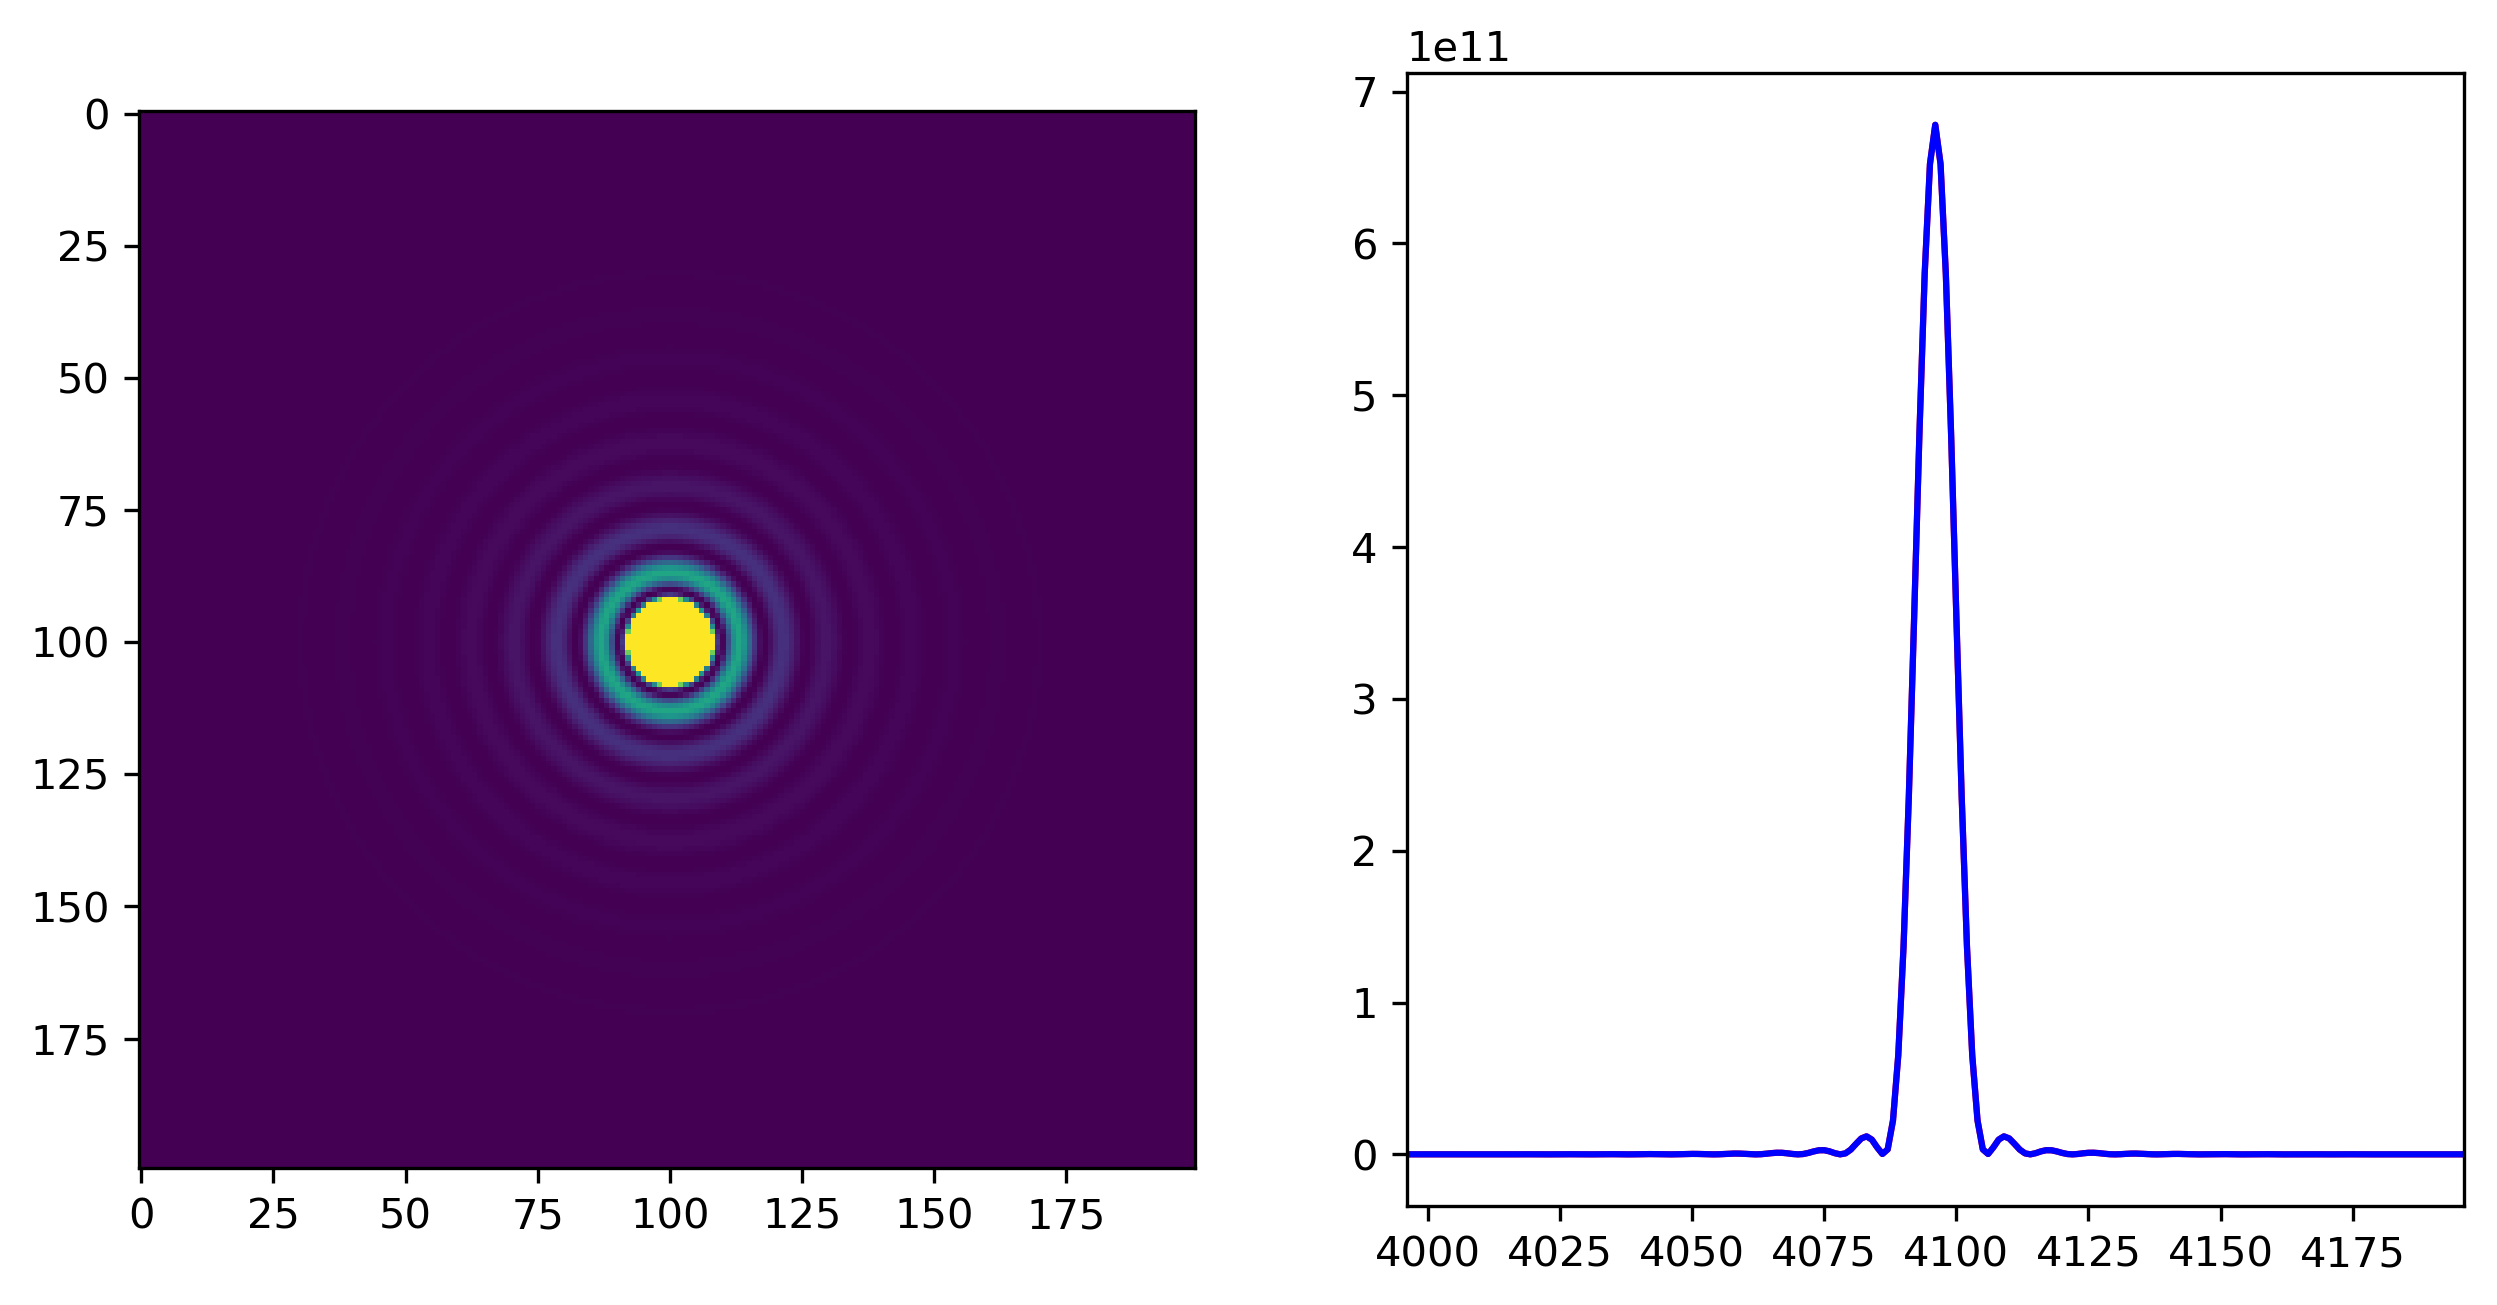

In [39]:
psf = np.abs(otf)**2
dx = 100
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(psf[int(radius+padding/2-dx):int(radius+padding/2+dx),
               int(radius+padding/2-dx):int(radius+padding/2+dx)],interpolation=None)
plt.clim([0,2e10])
plt.subplot(1,2,2)
plt.plot(psf[4096,:],'r')
plt.plot(psf[:,4096],'b')
plt.xlim([radius+padding/2-dx,radius+padding/2+dx]);

Let's create a **optical path difference** (OPD) that is quadratic (defocus).

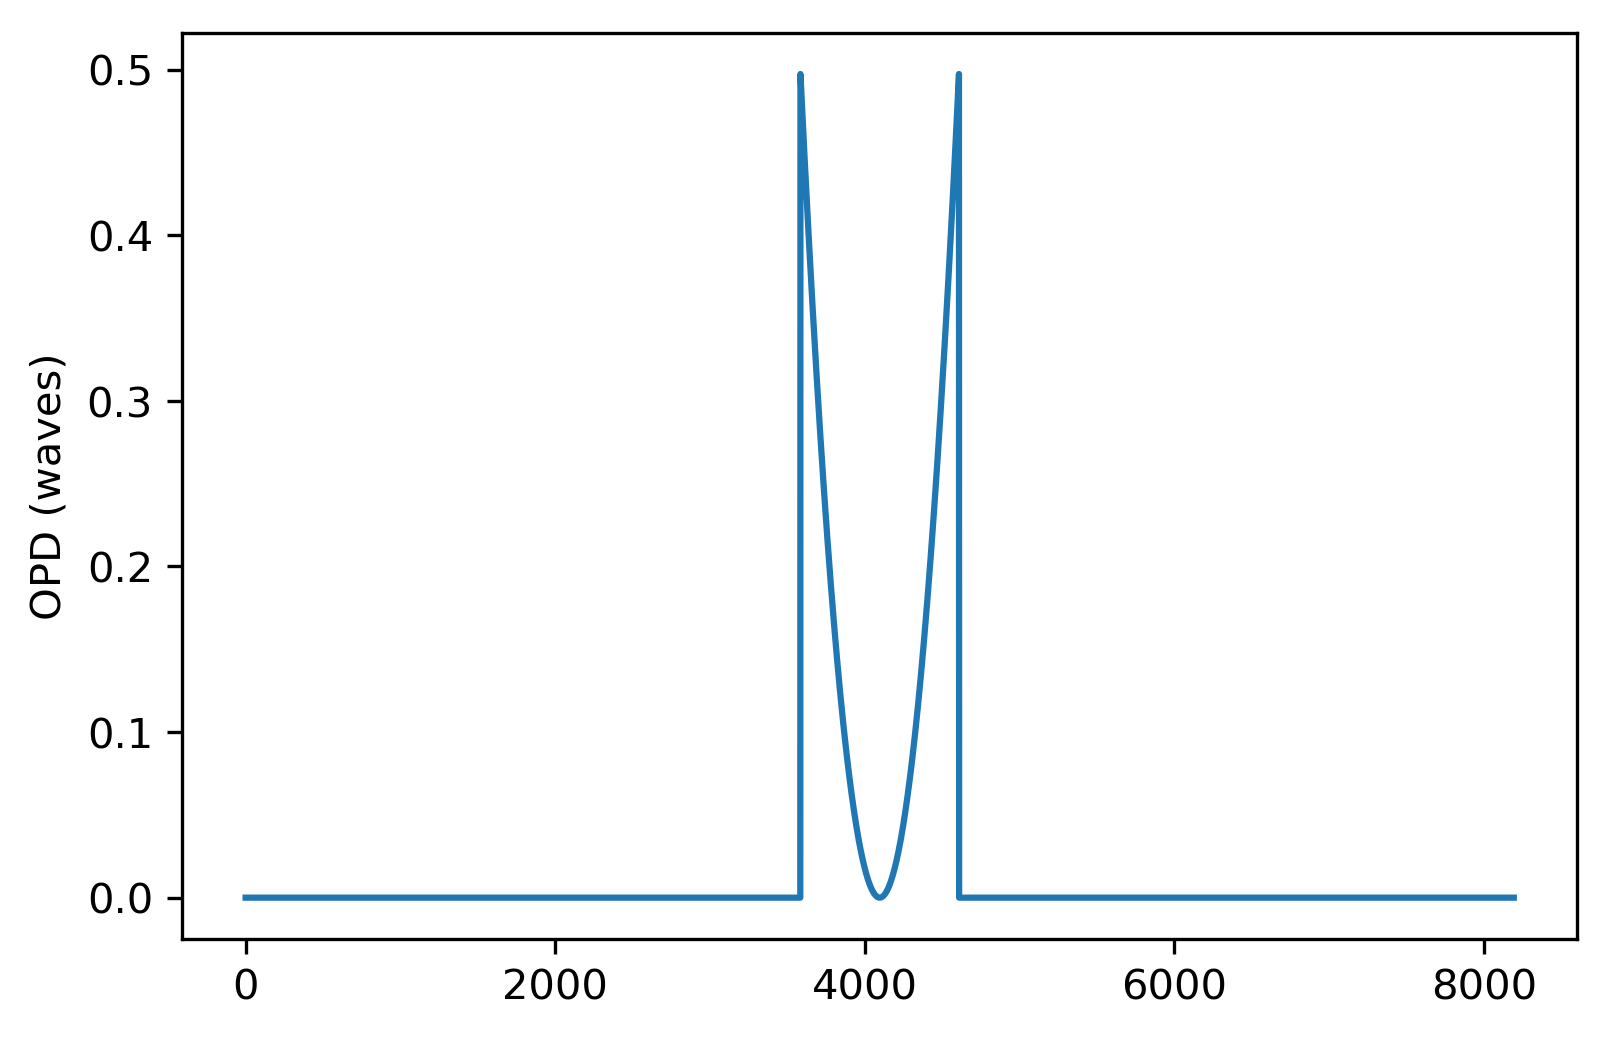

In [40]:
phi = np.pi
a = np.arange(8193)-4096
b = np.arange(8193)-4096
ax,by = np.meshgrid(a,b)
phase = (ax**2+by**2)*400/(2*4096.0**2) # Quadratic phase difference
radius = 512
padding = 8192-2*radius
telescopepupil = np.zeros((2*radius+1+padding, 2*radius+1+padding))
y,x = np.ogrid[-radius-padding/2:radius+1+padding/2, -radius-padding/2:radius+1+padding/2]
pmask = (x**2 + y**2 <= radius**2)
telescopepupil[pmask] = 1
phase[np.logical_not(pmask)] = 0;
plt.plot(phase[4096,:]/(2*np.pi))
plt.ylabel('OPD (waves)');

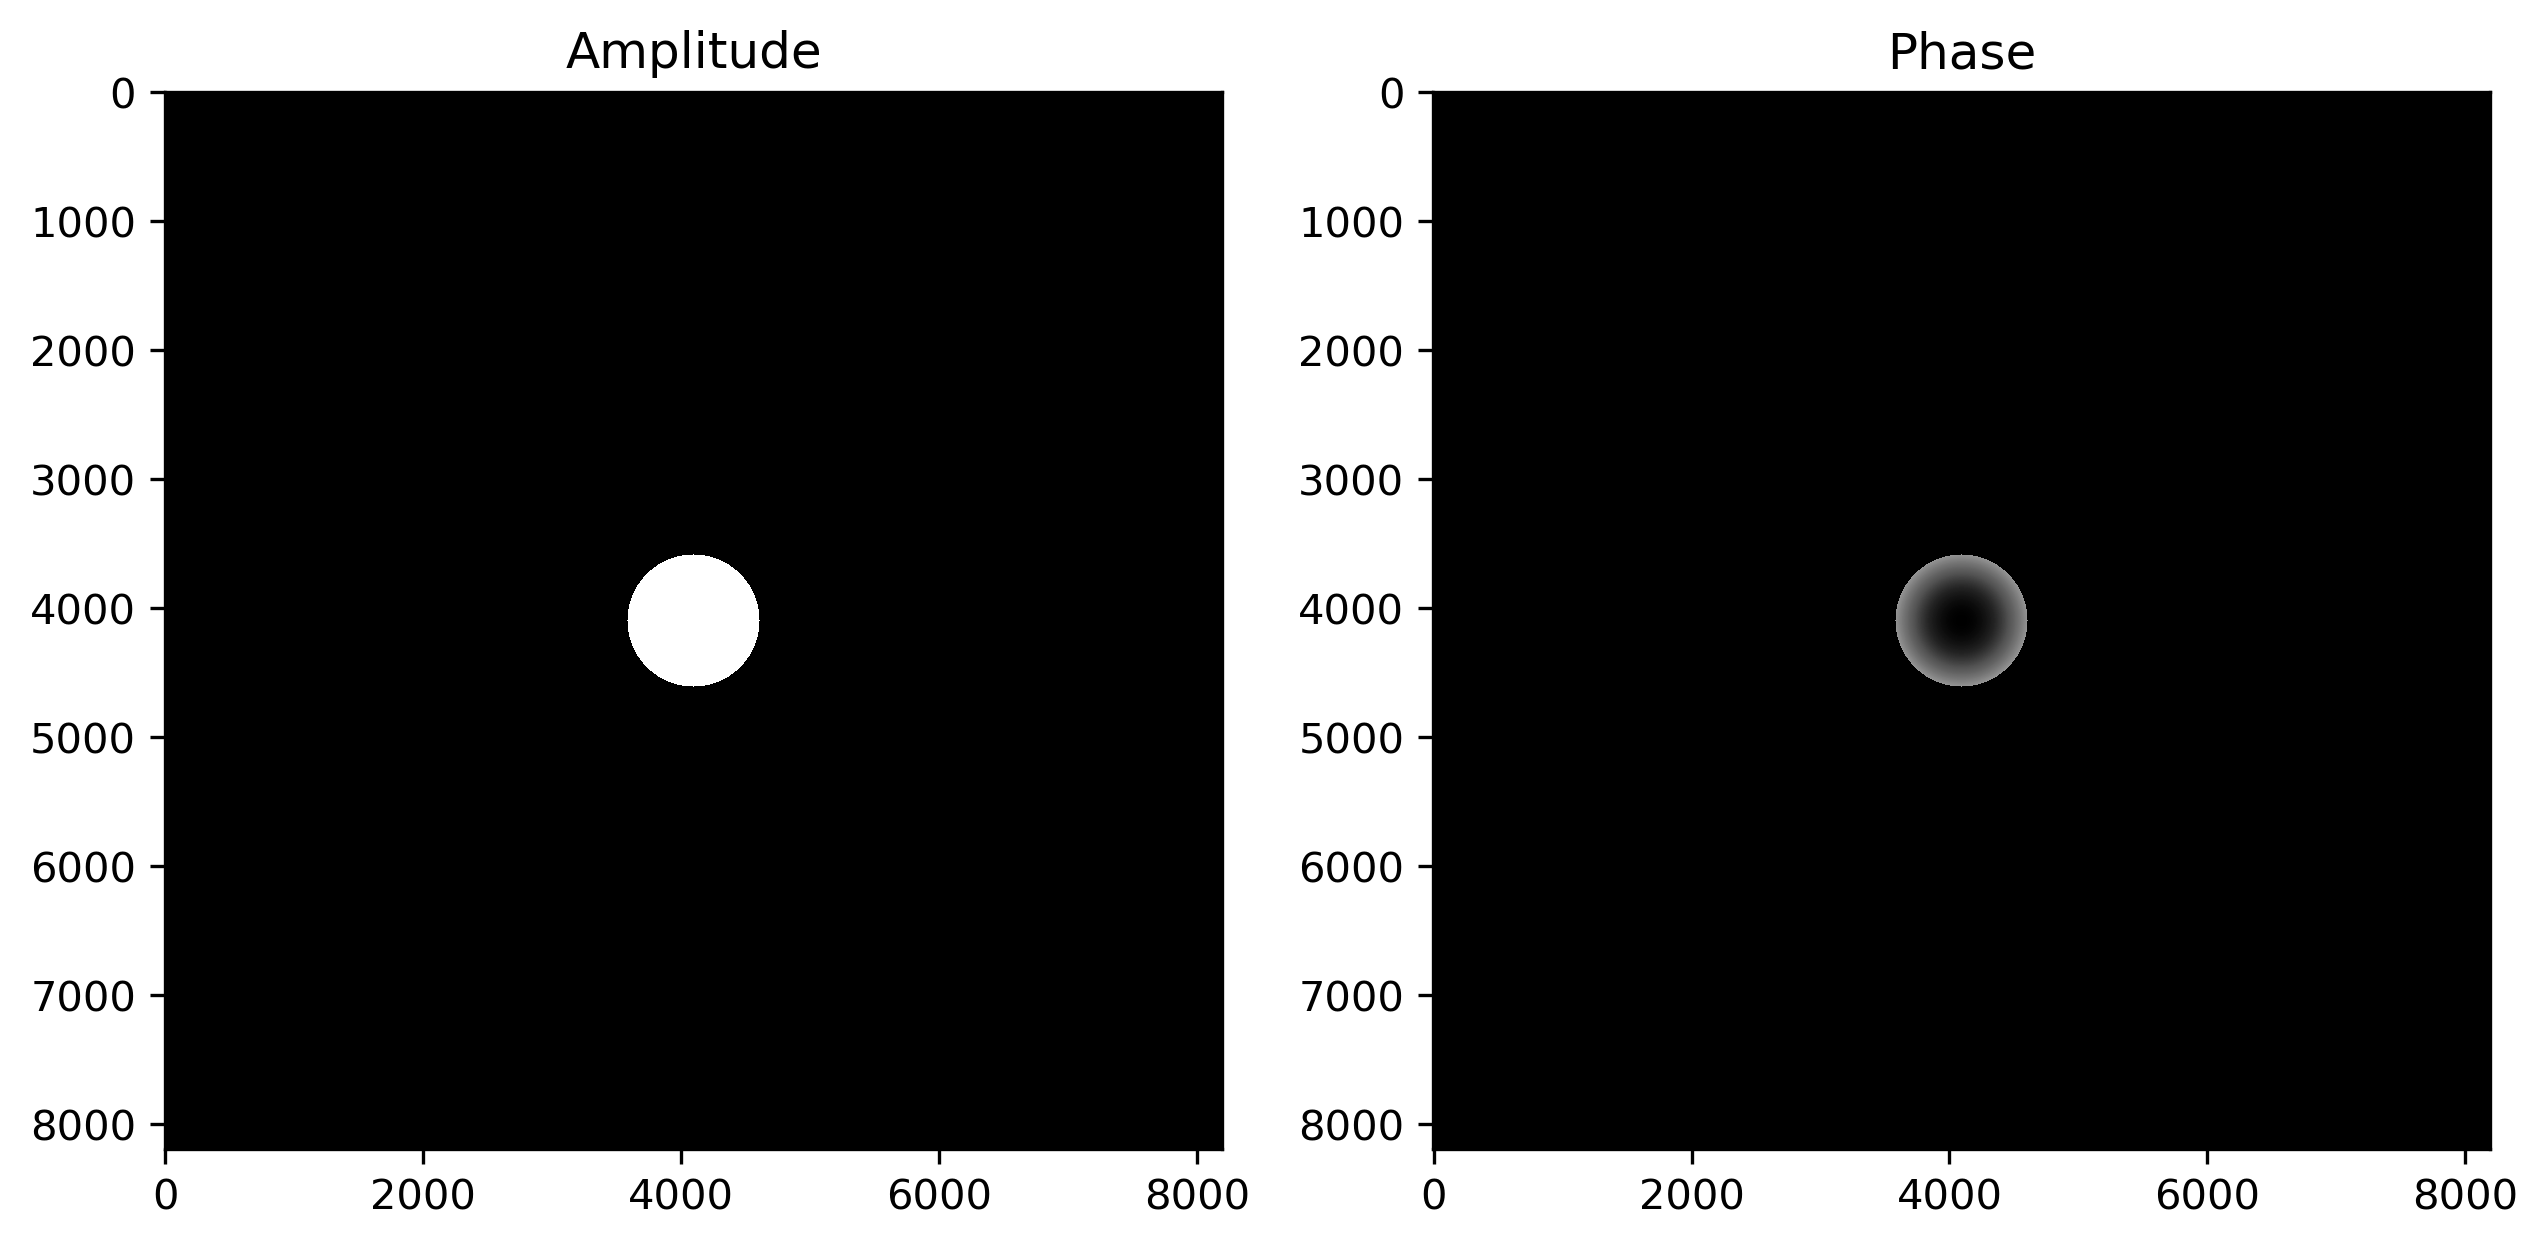

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(telescopepupil,cmap='Greys_r')
plt.title('Amplitude')
plt.subplot(1, 2, 2)
plt.imshow(phase,cmap='Greys_r')
plt.title('Phase')
plt.clim([0,2*np.pi]);

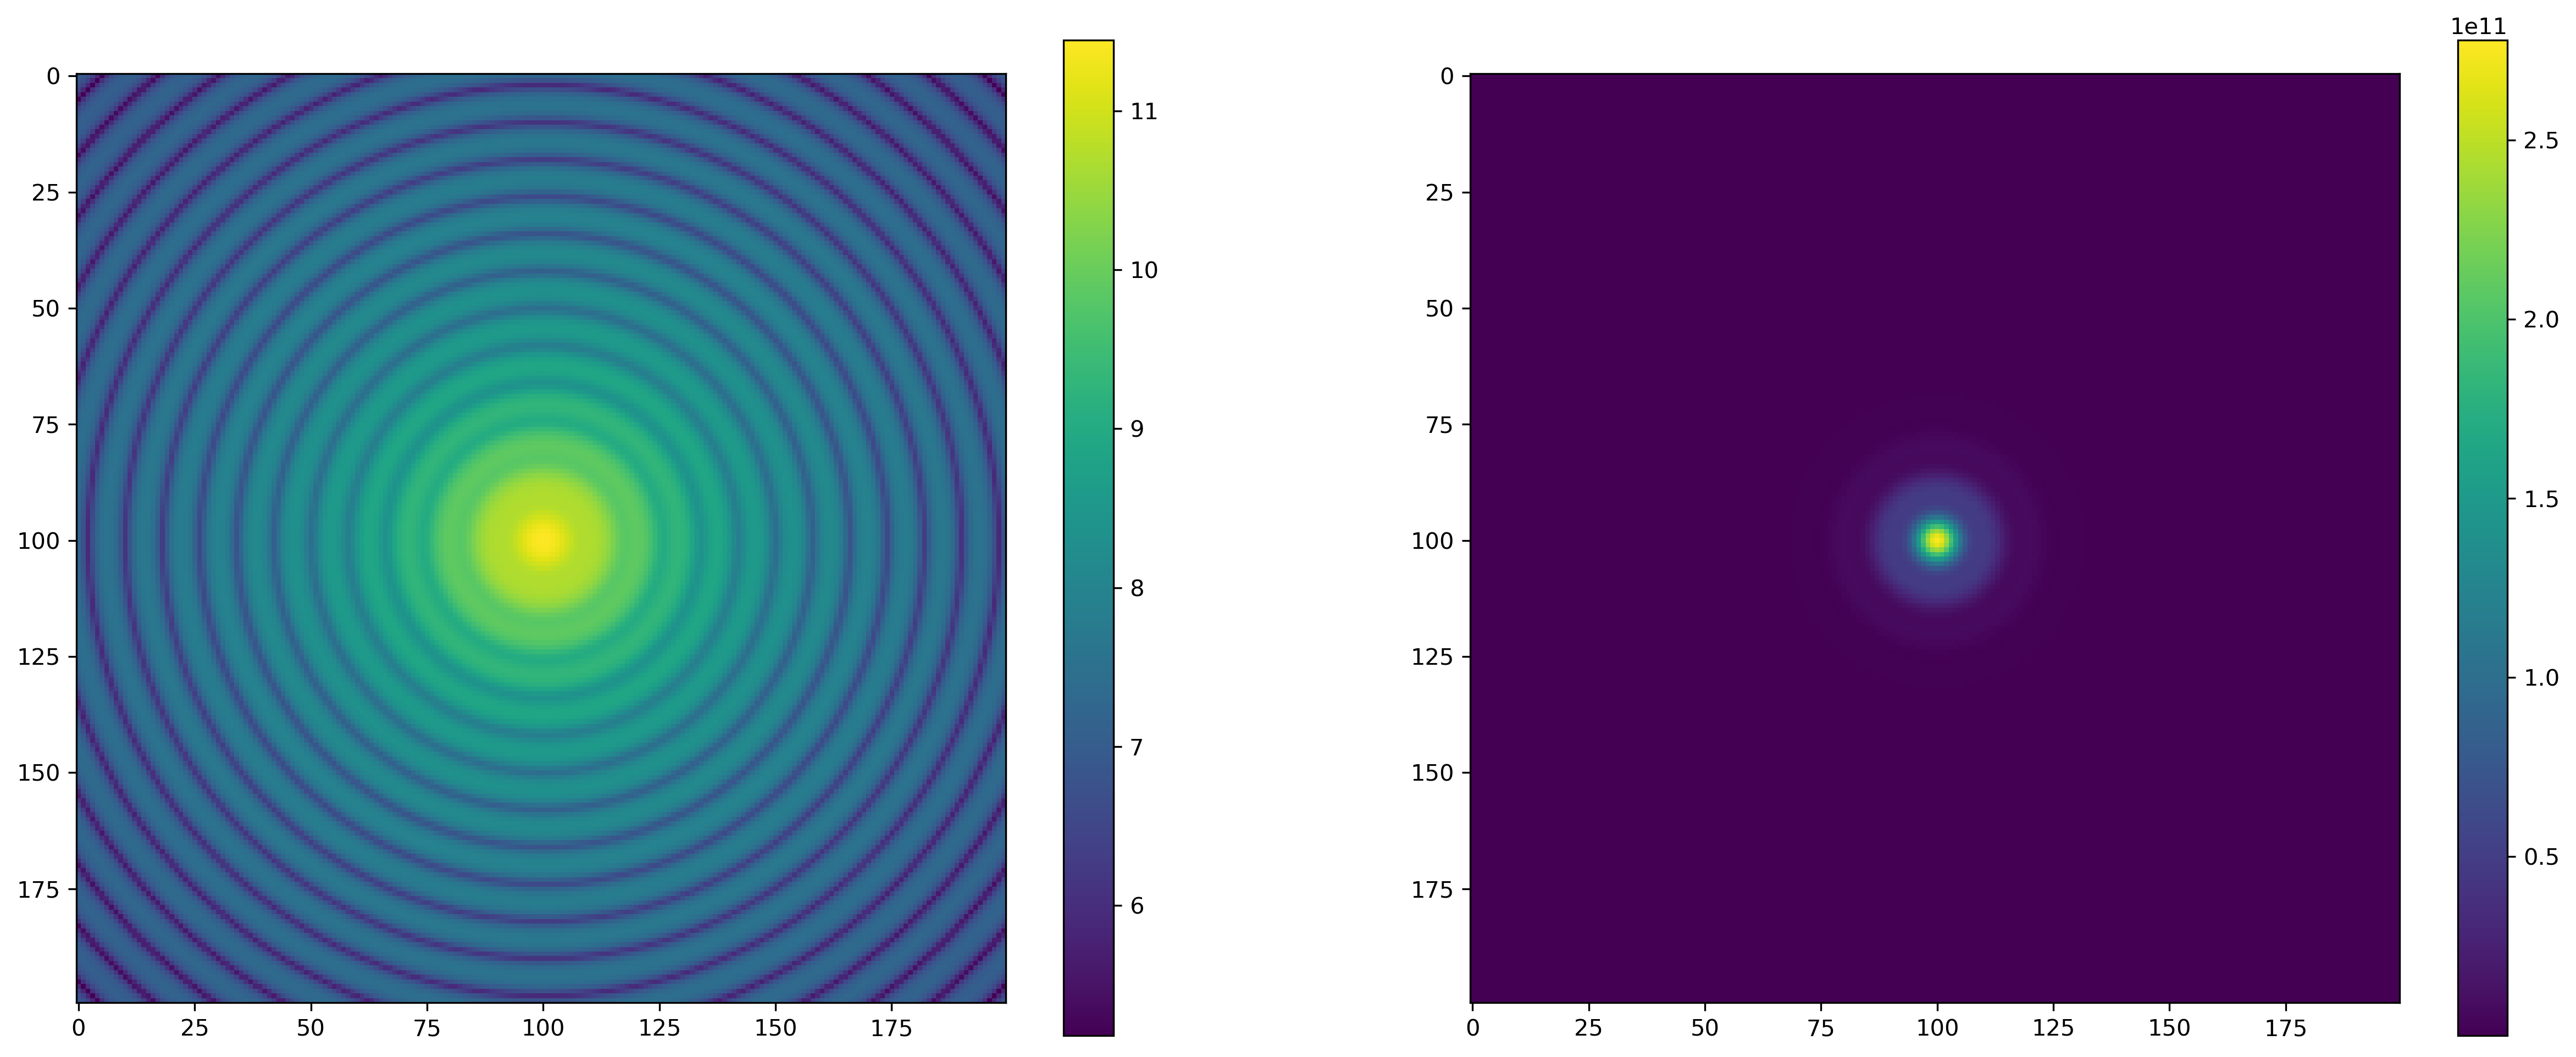

In [42]:
otf = np.fft.fftshift(np.fft.fft2(telescopepupil[0:8192,0:8192]*np.exp(-1j*phase[0:8192,0:8192])))
plt.figure(figsize=(20,8))
dx = 100
plt.subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(otf[int(radius+padding/2-dx):int(radius+padding/2+dx),int(radius+padding/2-dx):int(radius+padding/2+dx)])**2))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(otf[int(radius+padding/2-dx):int(radius+padding/2+dx),int(radius+padding/2-dx):int(radius+padding/2+dx)])**2)
plt.colorbar();

# Power Spectral Distribution of Noisy Data

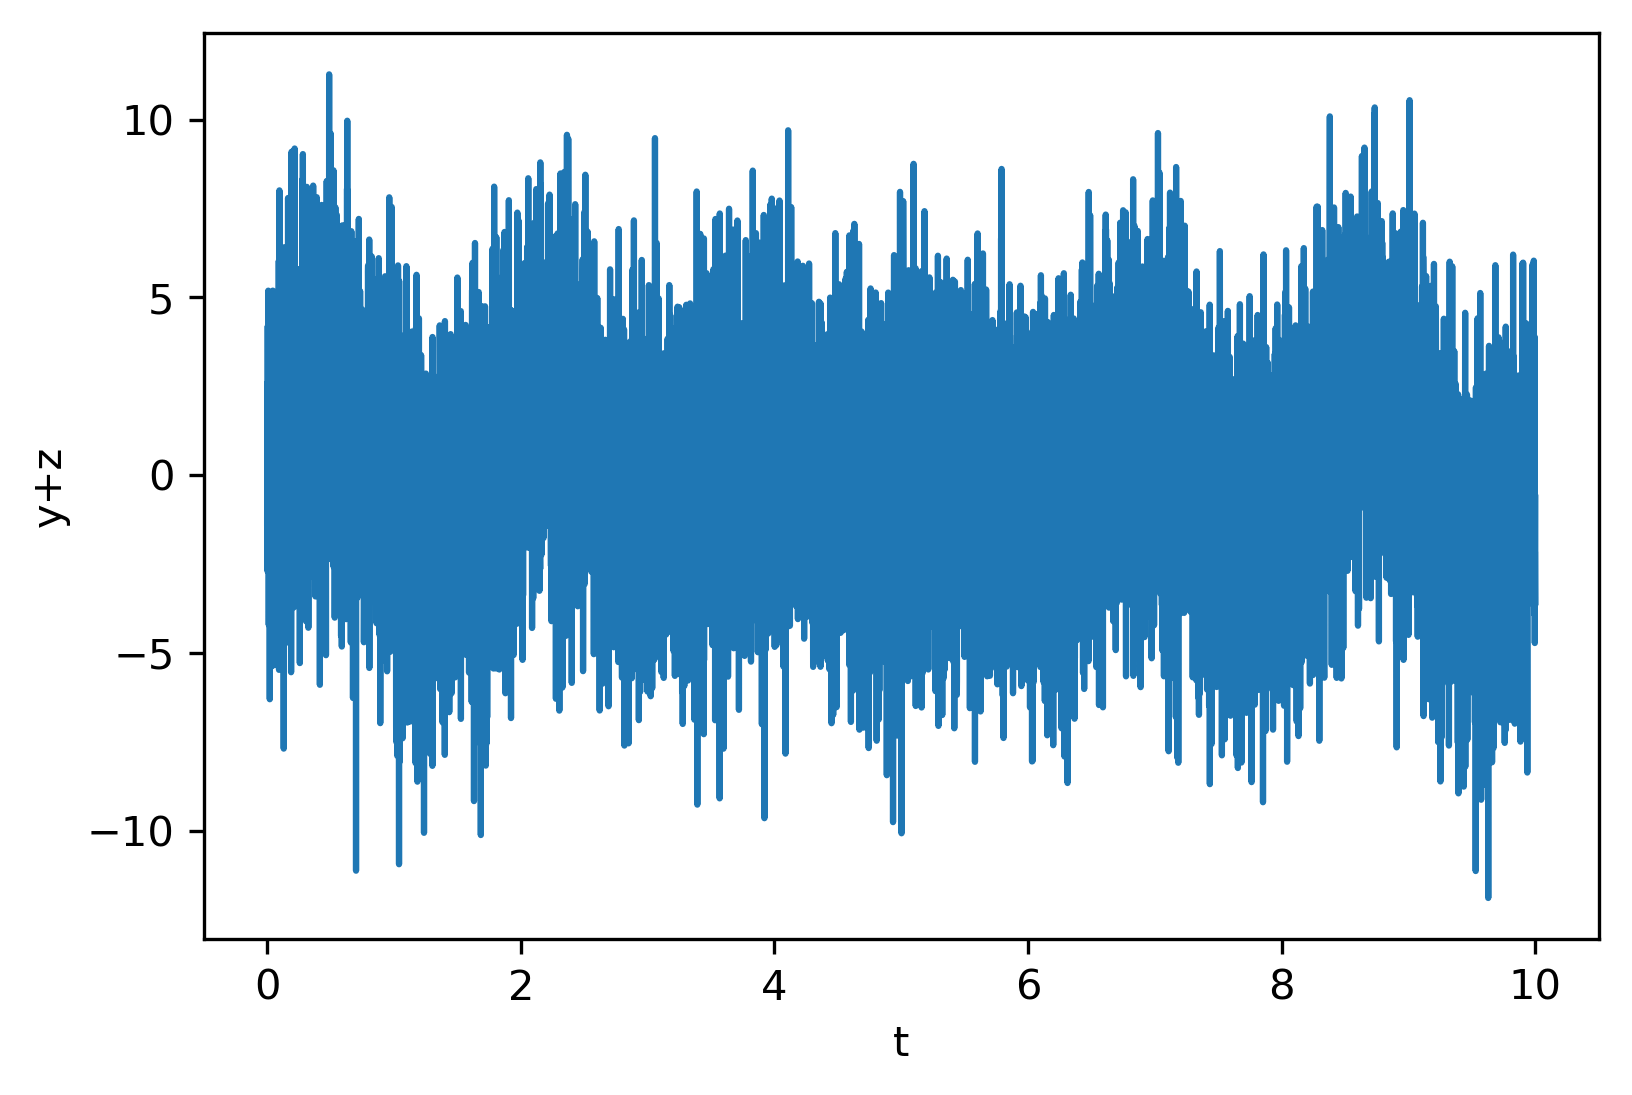

In [43]:
f = 5 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1
namplitude = 2
x = np.arange(sample)
y = amplitude*np.sin(2 * np.pi * f * x / sample)+np.random.randn(sample)*namplitude
f = 6 # Number of periods in one data sample
sample = 10000 # Number of samples
timestep = 0.001 # Time step in seconds
amplitude = 1.3
namplitude = 2
x = np.arange(sample)
z = amplitude*np.sin(2 * np.pi * f * x / sample)+np.random.randn(sample)*namplitude
plt.plot(x*timestep, y+z)
plt.xlabel('t')
plt.ylabel('y+z');

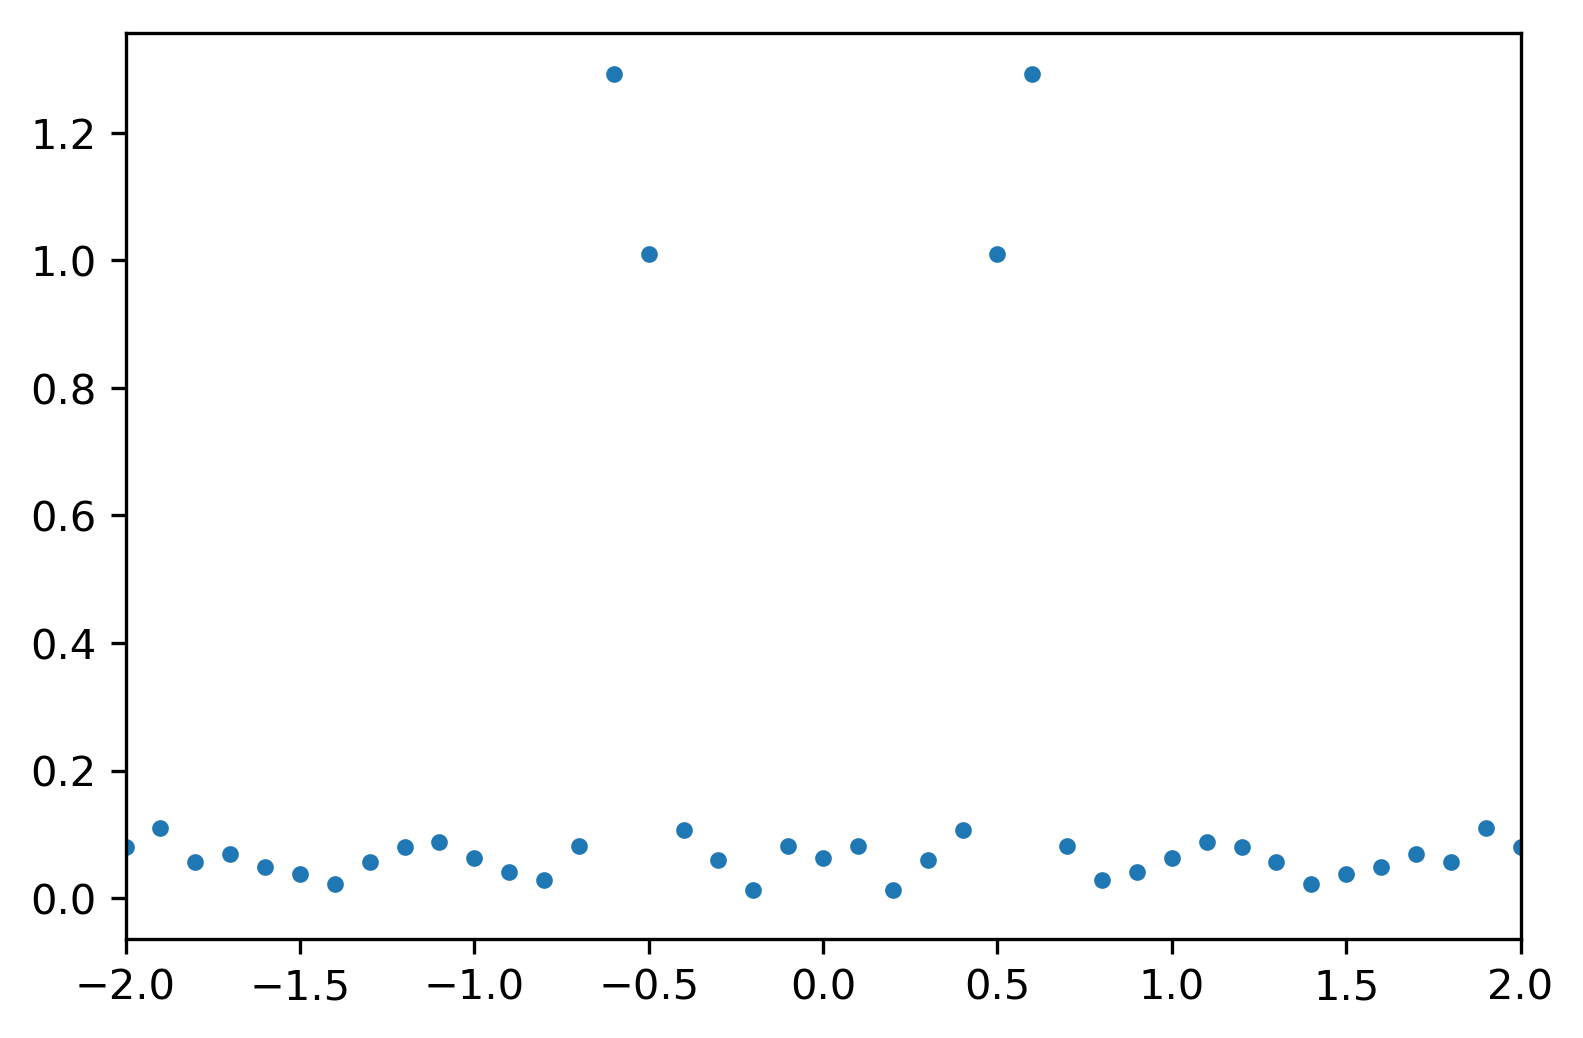

In [44]:
Fyz = np.fft.fft(y+z)/(sample/2)
Fyzf = np.fft.fftfreq(sample,d=timestep) #Calculate the frequency steps of the Fourier transform
plt.plot(Fyzf,np.abs(Fyz),'.')
plt.xlim([-2,2]);

# Modeling Noise

There is an effective method that can be used to model scale (or frequency) dependent noise and generate a simulated dataset using Fourier techniques. For this you will need to know the power spectrum of the noise, $P(f)$, to create the dataset. Below we look at frequency dependent noise that is often observed in time series data. The form of the power spectrum that we assume is the following: 

\begin{equation*}
P(f) = C_0f^{-\alpha}
\end{equation*}

where $C_0$ is a constant and $\alpha$ is a spectral index that can range from 0 to 2. You are probably familiar with the case where $\alpha = 0$, which is white noise. $\alpha = 1$ and $=2$ is pink and brown noise, respectively.  

In [49]:
sample = 1000000
phase = np.random.uniform(-np.pi,np.pi,size=sample)
f = (np.arange(sample)+1)*0.001
alpha = 2
power = 1/f**alpha
noise = np.sqrt(power)*np.exp(1j*phase)
timeseries = np.real(np.fft.ifft(noise))

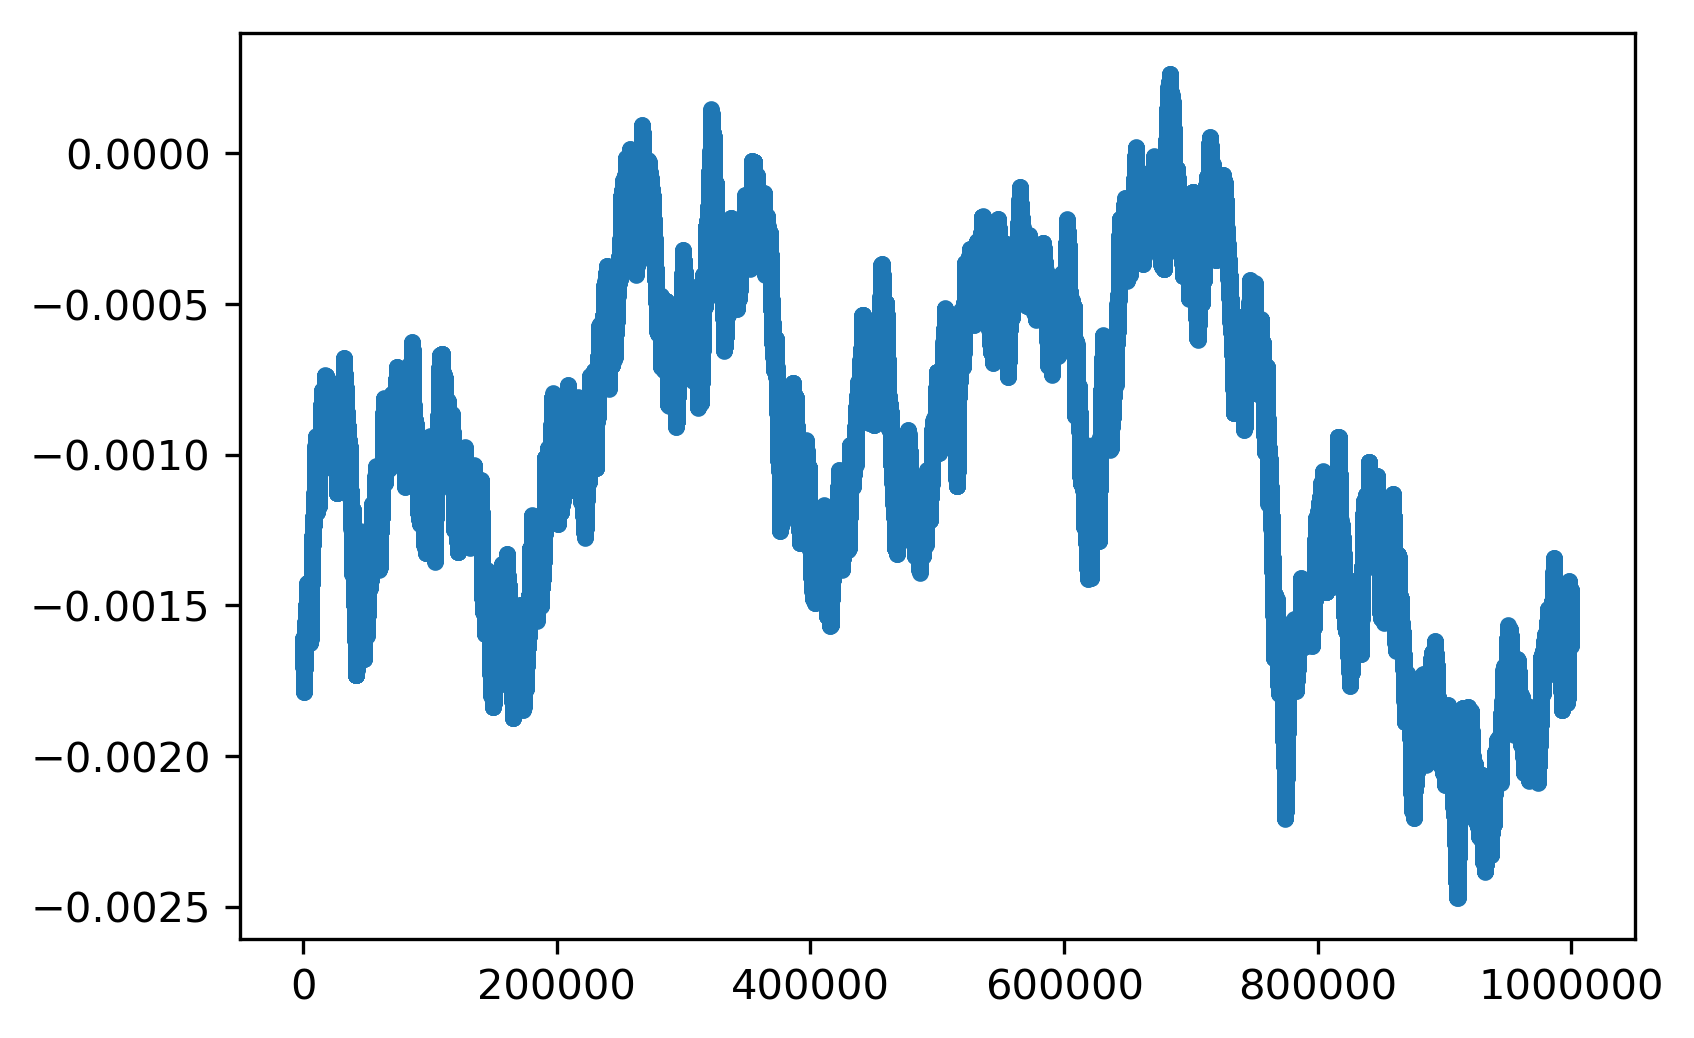

In [51]:
plt.plot(timeseries,'.');
#plt.xlim([0,2000])

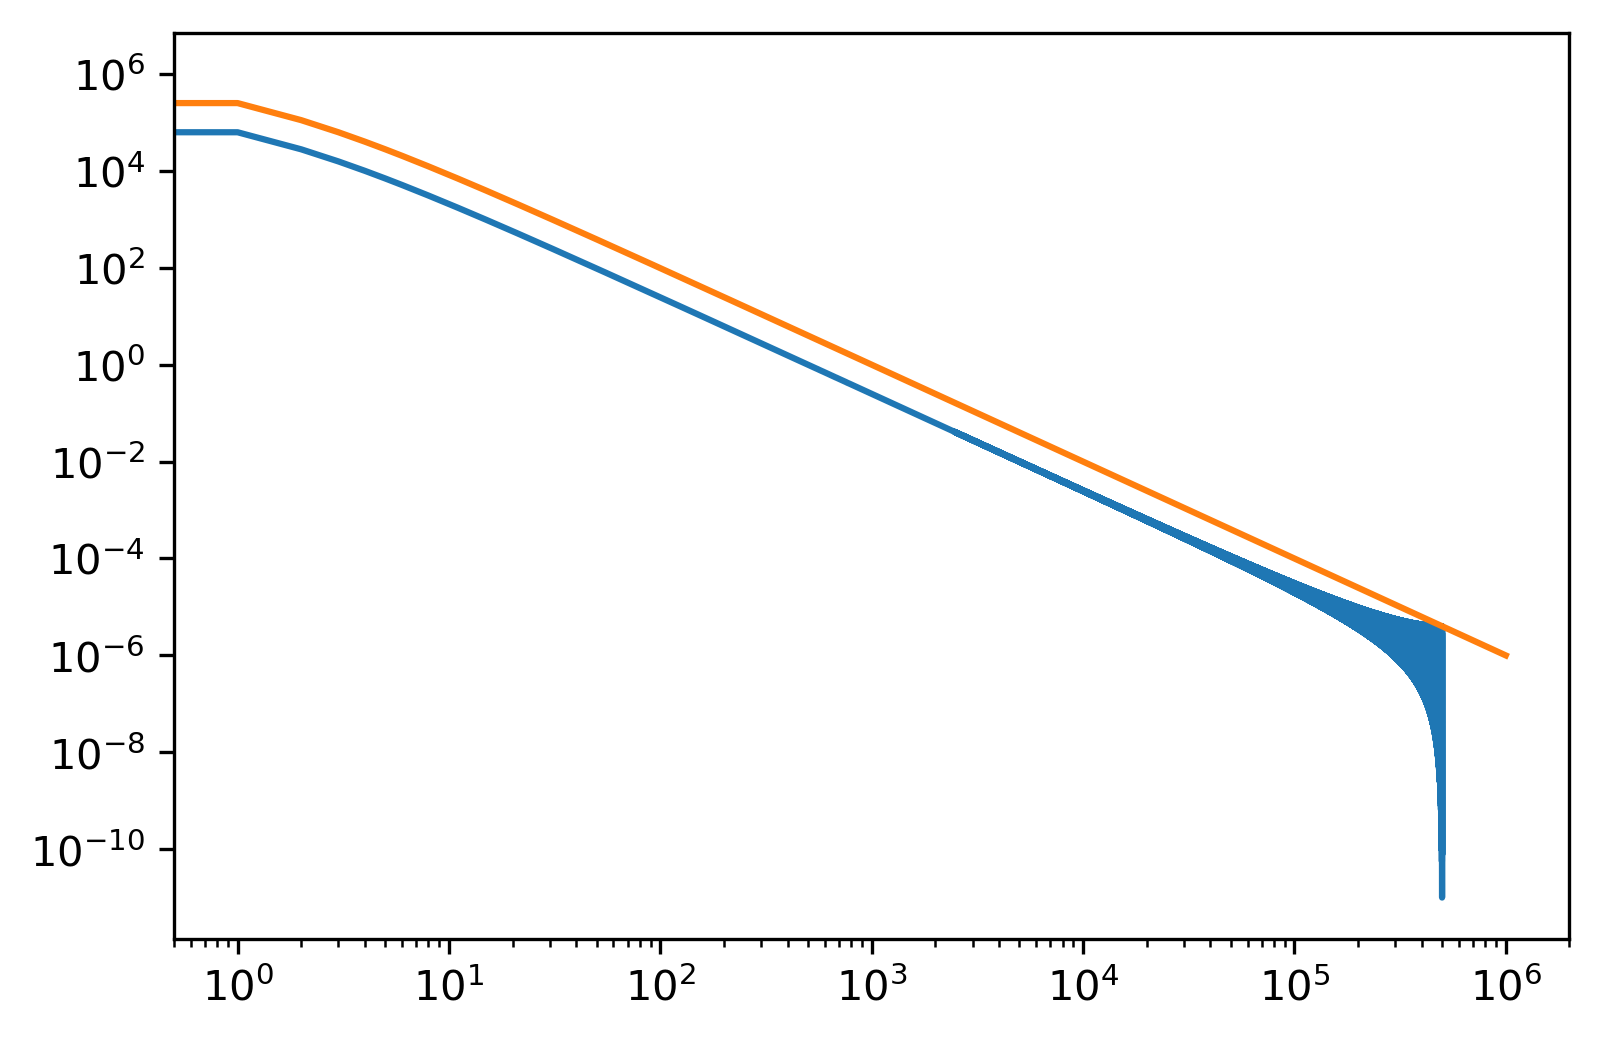

In [52]:
a = np.fft.fft(timeseries)
plt.plot(np.abs(a[0:sample/2])**2)
plt.xscale('log')
plt.yscale('log')
plt.plot(f**(-1.0*alpha));